In [2]:
library('igraph')


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



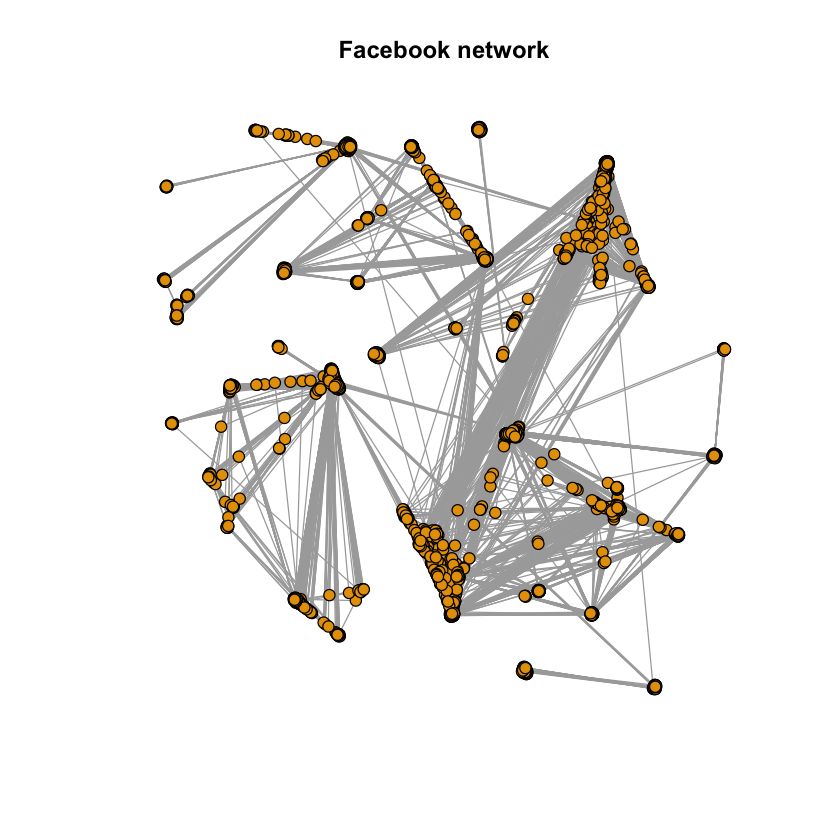

In [3]:
fb_combined = read_graph("facebook_combined.txt", format='ncol', directed = FALSE)
fb_el = as_edgelist(fb_combined)
g = graph_from_edgelist(fb_el, directed = FALSE)

plot(g, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Facebook network")

In [4]:
# QUESTION 1: Is the facebook network connected? If not, find the giant connected component
# (GCC) of the network and report the size of the GCC.

In [5]:
print(paste("Network connected: ", is_connected(g)))

[1] "Network connected:  TRUE"


In [6]:
# QUESTION 2: Find the diameter of the network. If the network is not connected, then find the
# diameter of the GCC.

In [7]:
print(paste("Network diameter: ", diameter(g)))

[1] "Network diameter:  8"


In [8]:
# QUESTION 3: Plot the degree distribution of the facebook network and report the average
# degree.

[1] "Average network degree:  522.5"


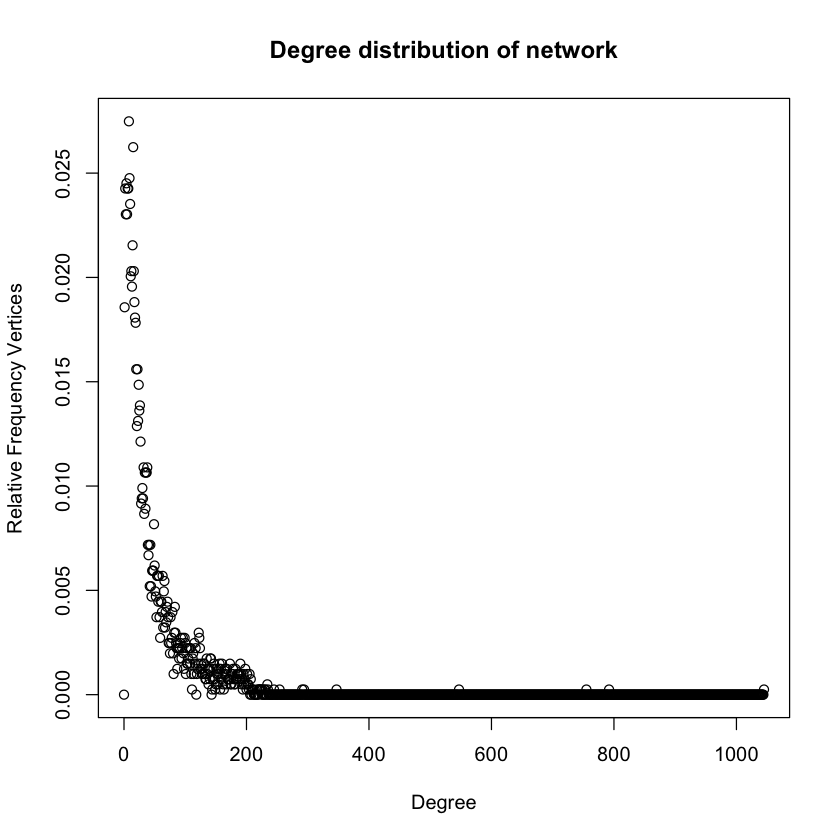

In [9]:
unique_degrees = unique(sort(degree(g)))
if (unique_degrees[1]!=0) {
    unique_degrees = seq(0,max(unique_degrees))
}
dd = degree_distribution(g)

plot(unique_degrees, dd, main="Degree distribution of network", xlab="Degree", ylab="Relative Frequency Vertices")
print(paste("Average network degree: ", mean(unique_degrees)))

In [10]:
# QUESTION 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to
# the plot and estimate the slope of the line.

#TODO: Add line. Seems there's -INF in the plot

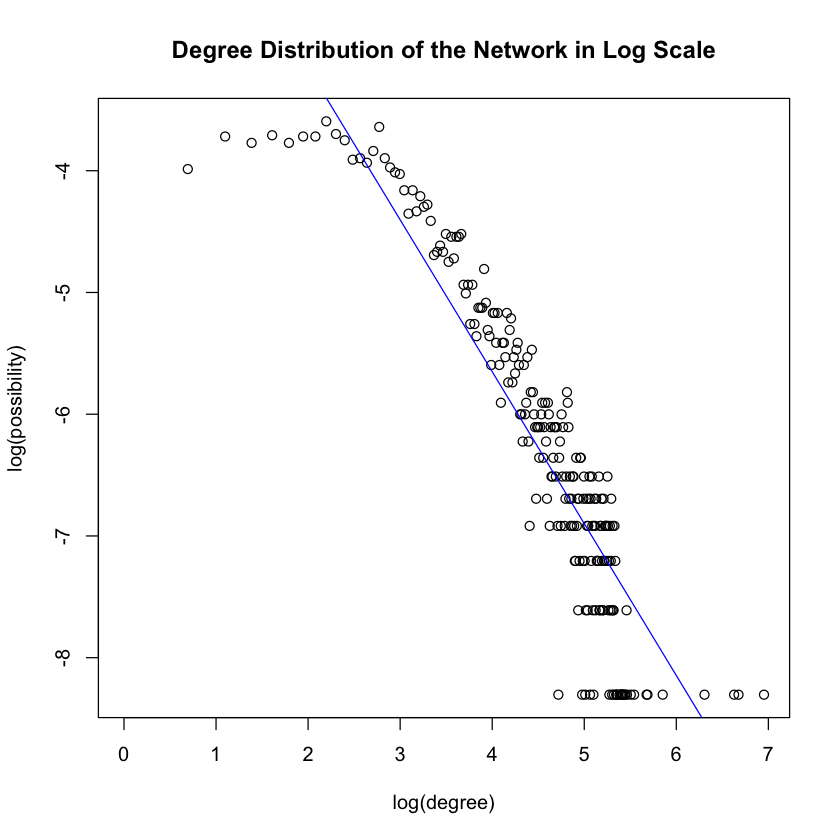

In [11]:
log_degree = log(c(1:length(degree.distribution(g))))
log_distr = log(degree.distribution(g))

log_degree_x = log_degree[-which(is.infinite(log_distr))]
log_distr_y = log_distr[-which(is.infinite(log_distr))]

plot(log_degree, log_distr, main="Degree Distribution of the Network in Log Scale",xlab="log(degree)",ylab="log(possibility)")
abline(lm(log_distr_y~log_degree_x), col="blue") # regression line (y~x) 

In [12]:
# QUESTION 5: Create a personalized network of the user whose ID is 1. How many nodes and
# edges does this personalized network have?

[1] "Network ID 1 number of nodes:  348"
[1] "Network ID 1 number of edges:  2866"


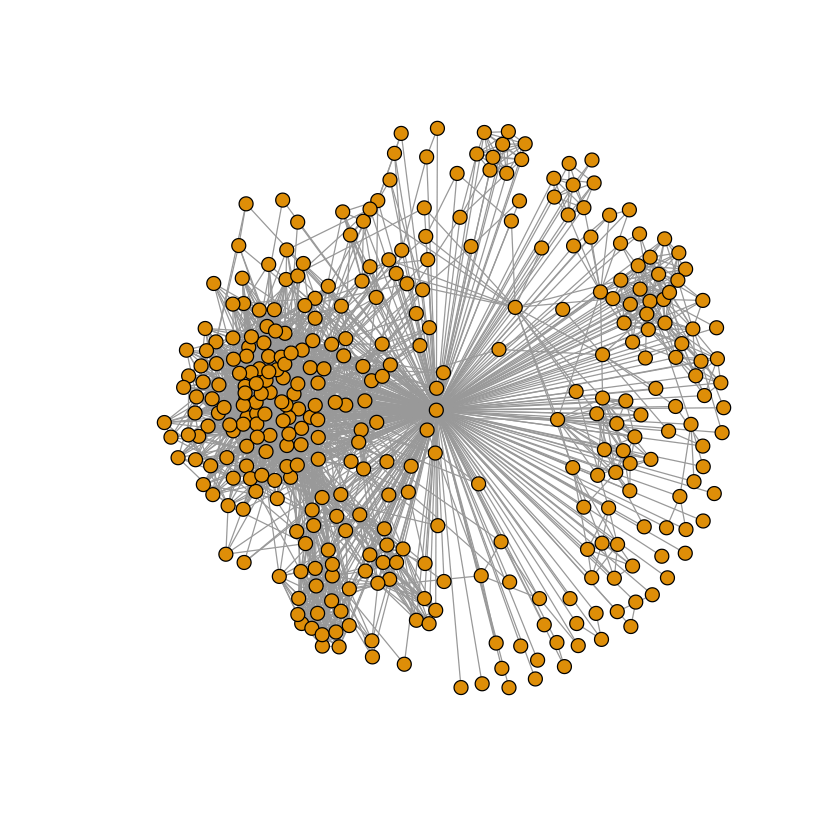

In [14]:
g1 = make_ego_graph(g, order=1, nodes=c('0'))[[1]]
plot(g1, edge.arrow.size=.1, vertex.size=5, vertex.label=NA)

print(paste("Network ID 1 number of nodes: ", vcount(g1)))
print(paste("Network ID 1 number of edges: ", ecount(g1)))

In [13]:
# QUESTION 6: What is the diameter of the personalized network? Please state a trivial upper
# and lower bound for the diameter of the personalized network.

In [15]:
print(paste("Network ID 1 diameter: ", diameter(g1)))

[1] "Network ID 1 diameter:  2"


In [16]:
# QUESTION 7: In the context of the personalized network, what is the meaning of the diameter
# of the personalized network to be equal to the upper bound you derived in Question 6. What is the
# meaning of the diameter of the personalized network to be equal to the lower bound you derived in
# Question 6?

In [17]:
facebook_graph = fb_combined
facebook_edgelist_graph = g

In [18]:
# QUESTION 8: How many core nodes are there in the Facebook network. What is the average
# degree of the core nodes?

In [19]:
# question 8

# find indices of core nodes

nodes = c(V(facebook_edgelist_graph)$name)
core_nodes = c()
avg_core_deg = c()
for(i in nodes){
    lenth_neighbors = length(neighbors(facebook_edgelist_graph,i))
    if(lenth_neighbors > 200){
        avg_core_deg = c(avg_core_deg, degree(facebook_edgelist_graph, i))
        core_nodes = c(core_nodes,i)
    } 
}

print(paste('Question 8 - No. of core nodes:', length(core_nodes)))
print(paste('Question 8 - average degree:', mean(avg_core_deg)))

[1] "Question 8 - No. of core nodes: 40"
[1] "Question 8 - average degree: 279.375"


In [7]:
node_id_names = c(1,108,349,484,1087)

In [20]:
# QUESTION 9: For each of the above core node’s personalized network, find the community structure
# using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare
# the modularity scores of the algorithms. For visualization purpose, display the community structure
# of the core node’s personalized networks using colors. Nodes belonging to the same community
# should have the same color and nodes belonging to different communities should have different
# color. In this question, you should have 15 plots in total.

[1] "Question 9 - Fast Greedy Modularity: 0.413101372834235"
[1] "Question 9 - Edge Betweenness Modularity: 0.353302172546335"


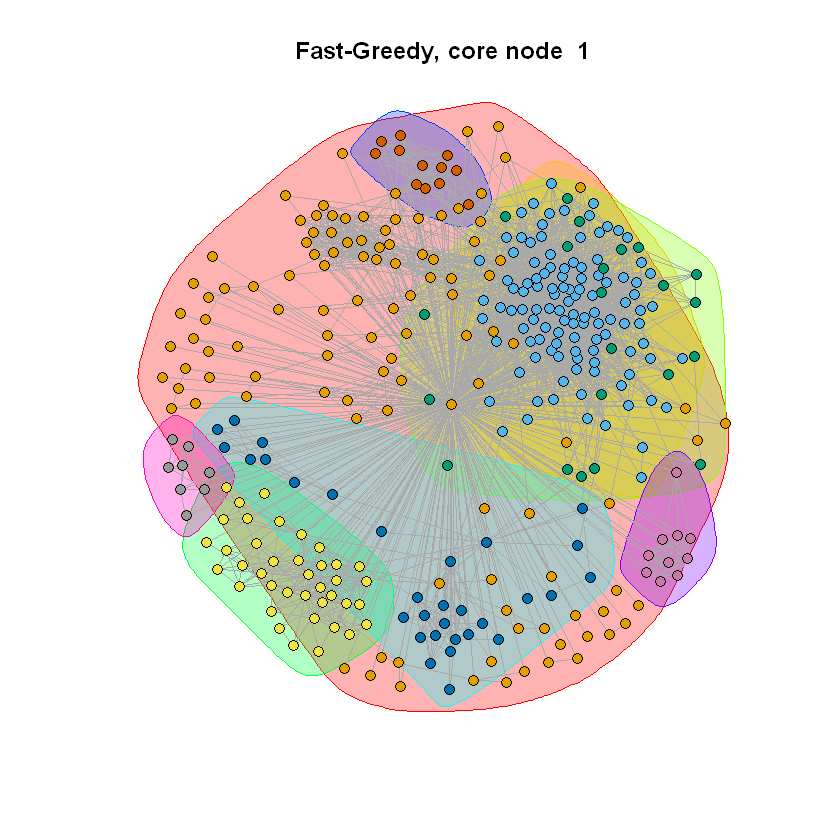

[1] "Question 9 - Infomap Modularity: 0.389118471050977"


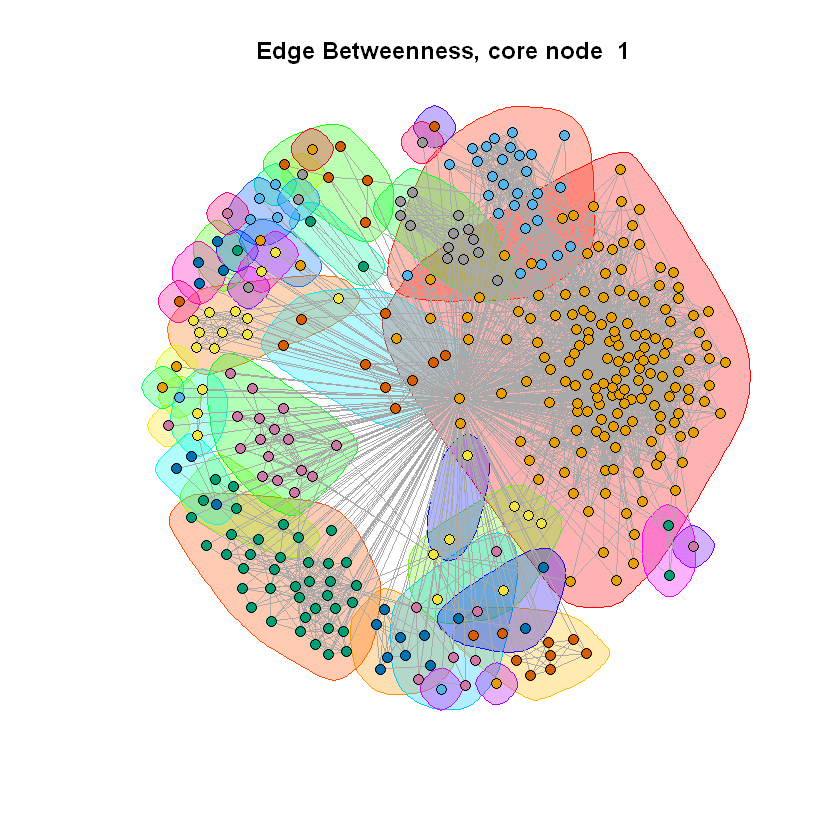

[1] "Question 9 - Fast Greedy Modularity: 0.435958134882439"


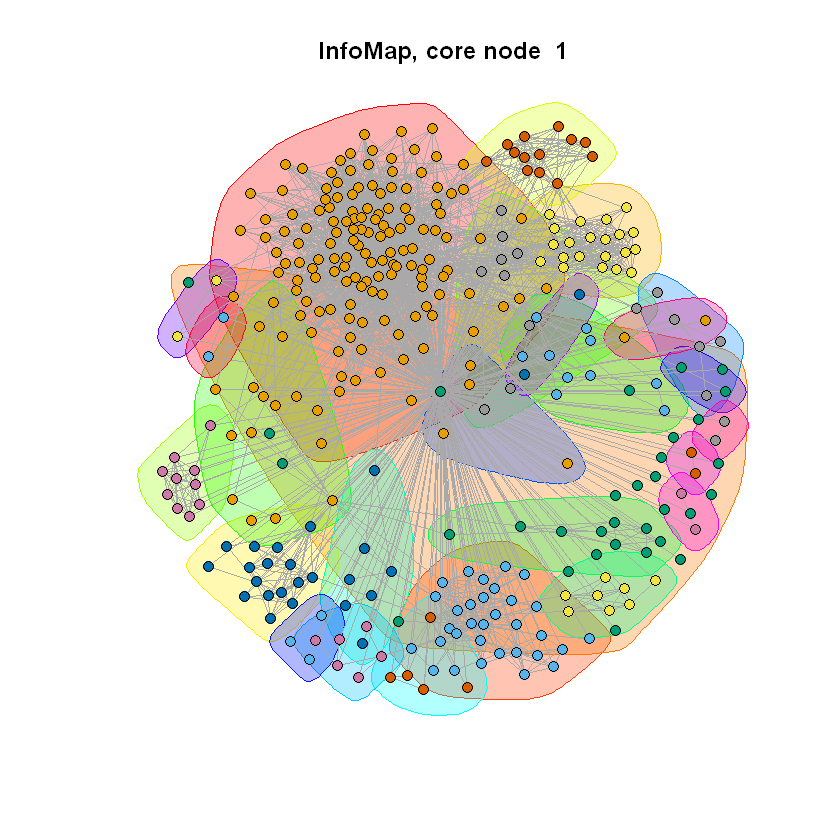

[1] "Question 9 - Edge Betweenness Modularity: 0.506754916538902"


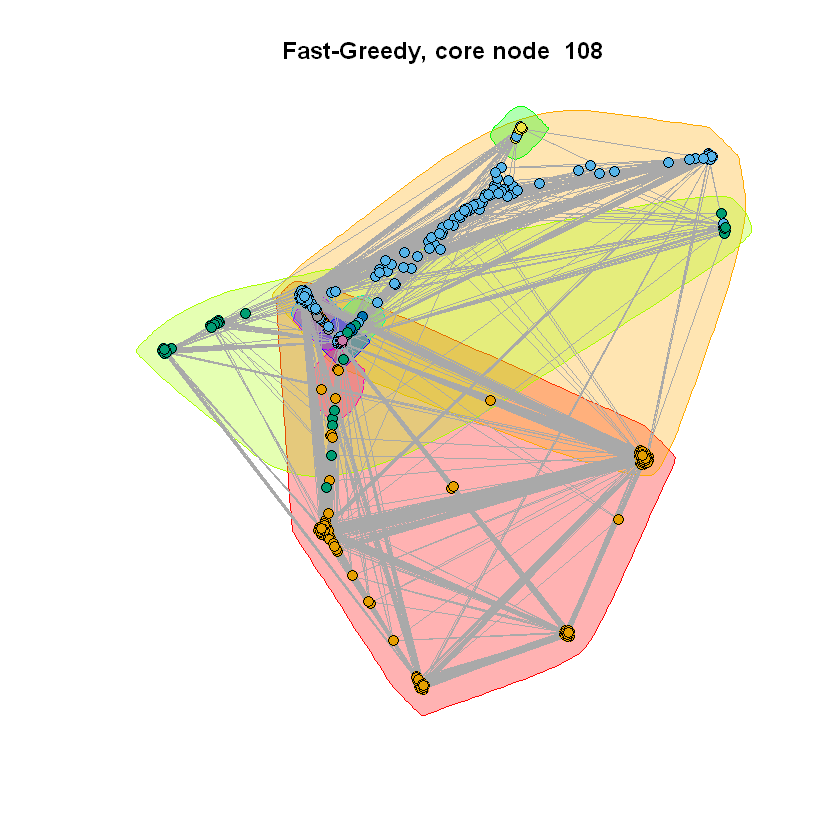

[1] "Question 9 - Infomap Modularity: 0.508453664933893"


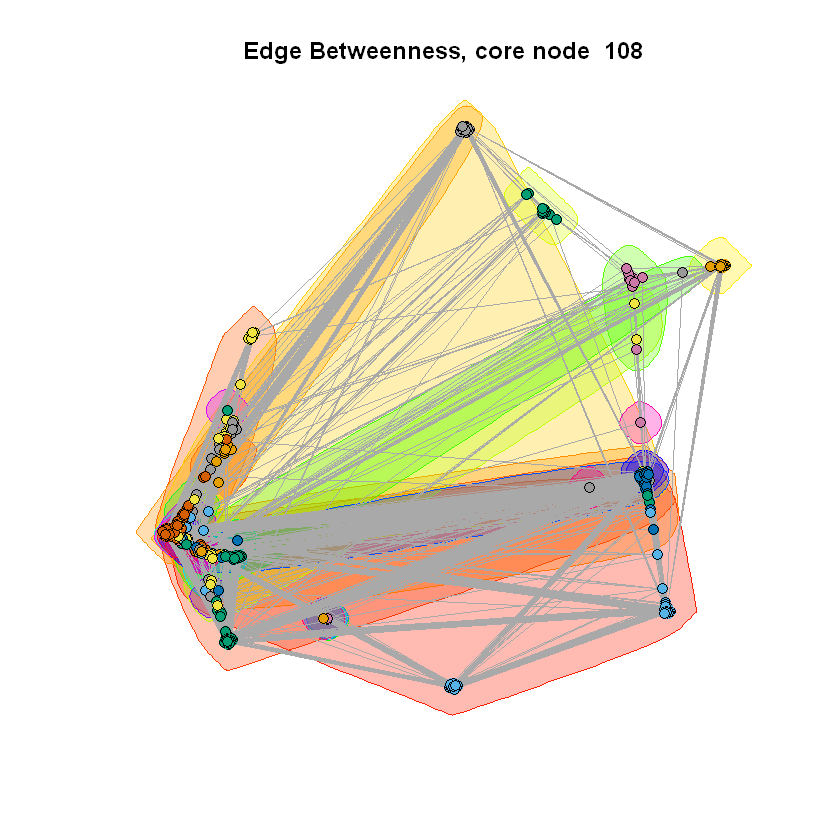

[1] "Question 9 - Fast Greedy Modularity: 0.250346079690513"


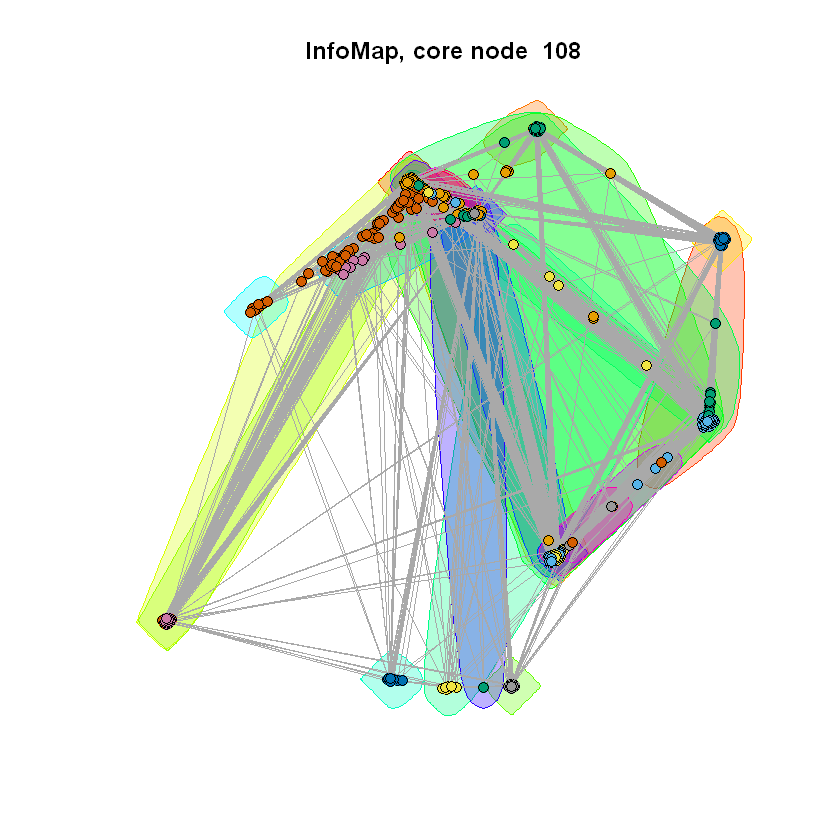

[1] "Question 9 - Edge Betweenness Modularity: 0.133528021370078"


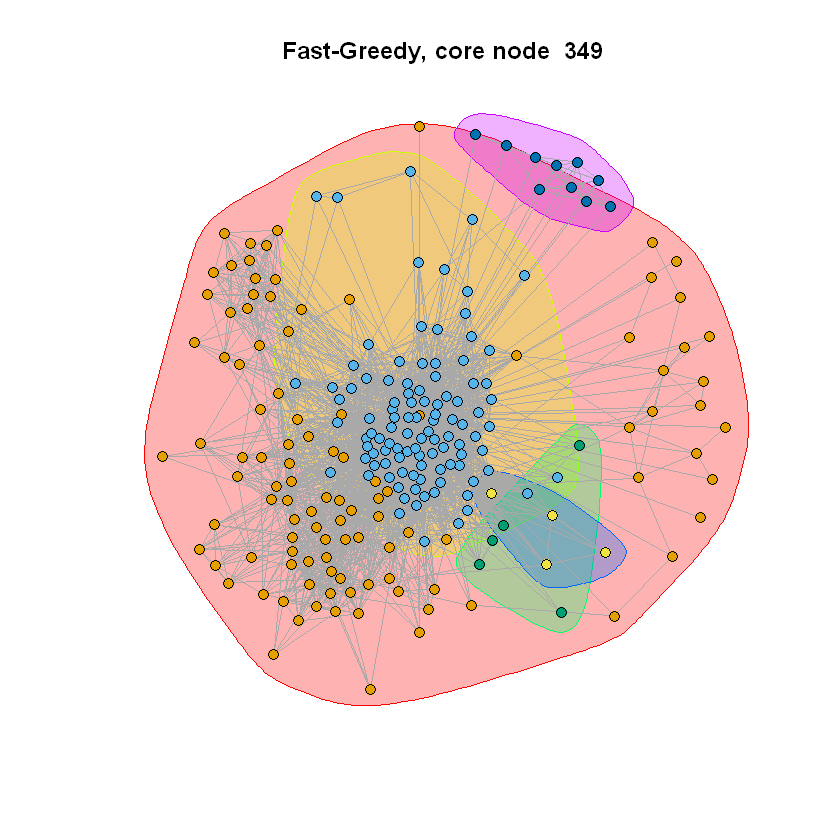

[1] "Question 9 - Infomap Modularity: 0.203752997872299"


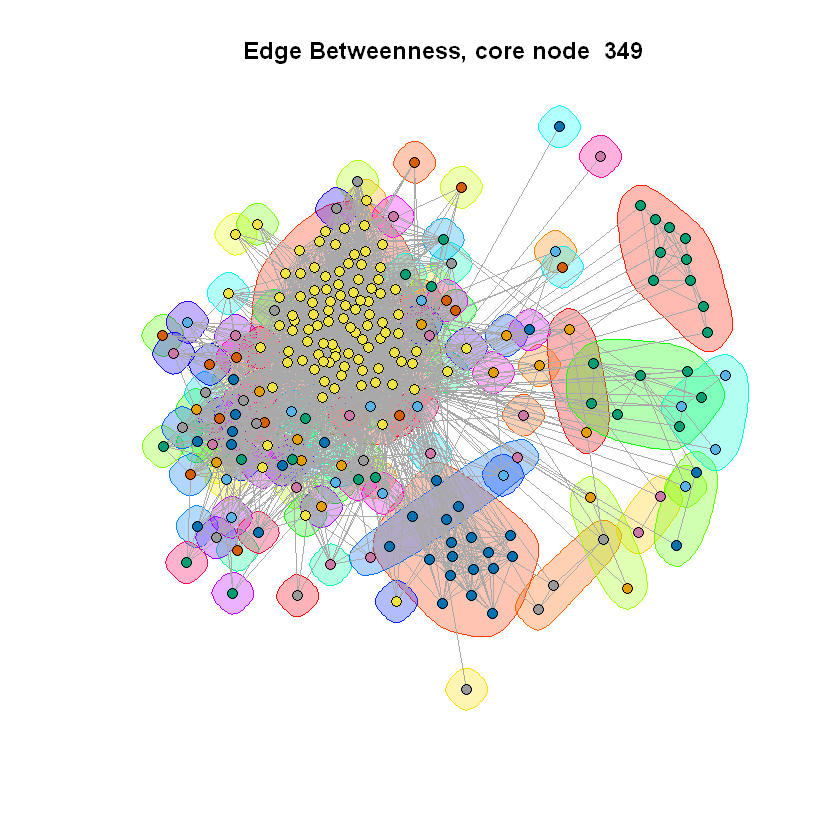

[1] "Question 9 - Fast Greedy Modularity: 0.507001642196514"


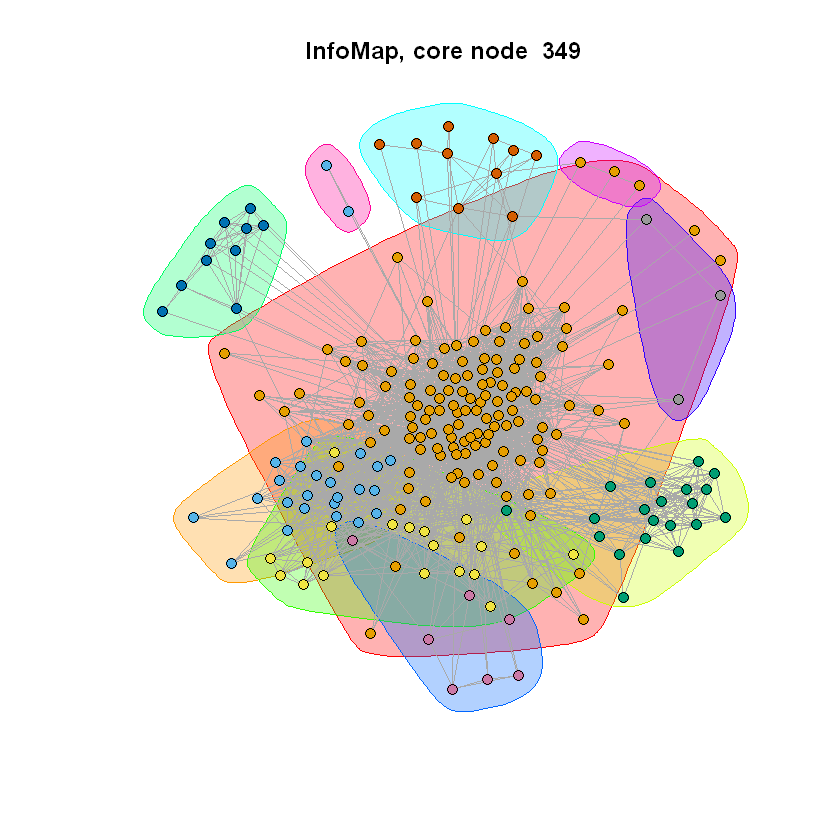

[1] "Question 9 - Edge Betweenness Modularity: 0.489095180244803"


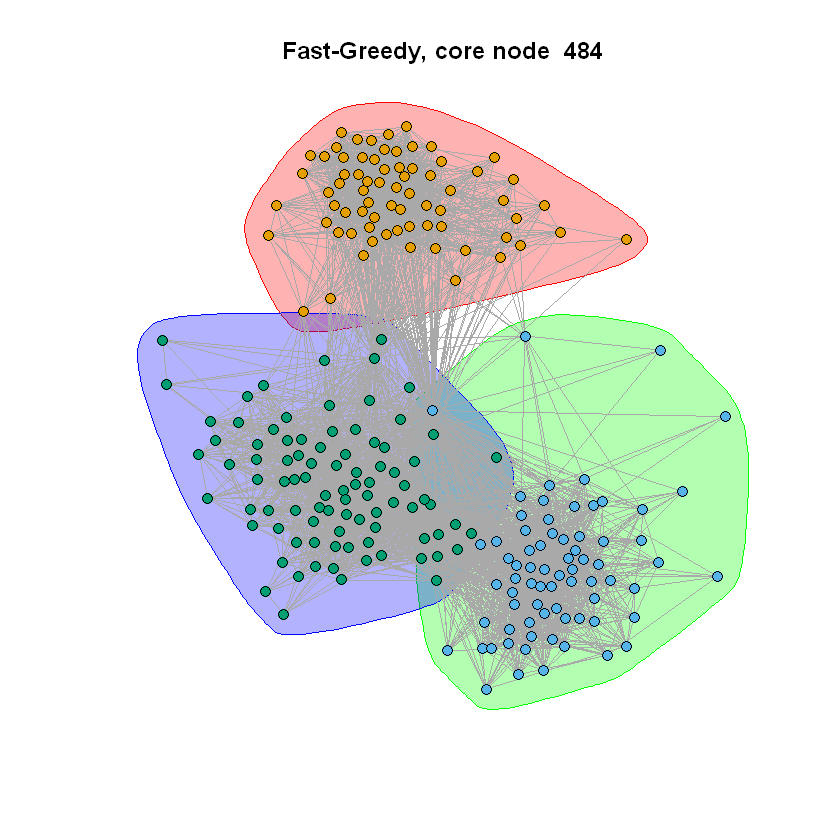

[1] "Question 9 - Infomap Modularity: 0.515278752174842"


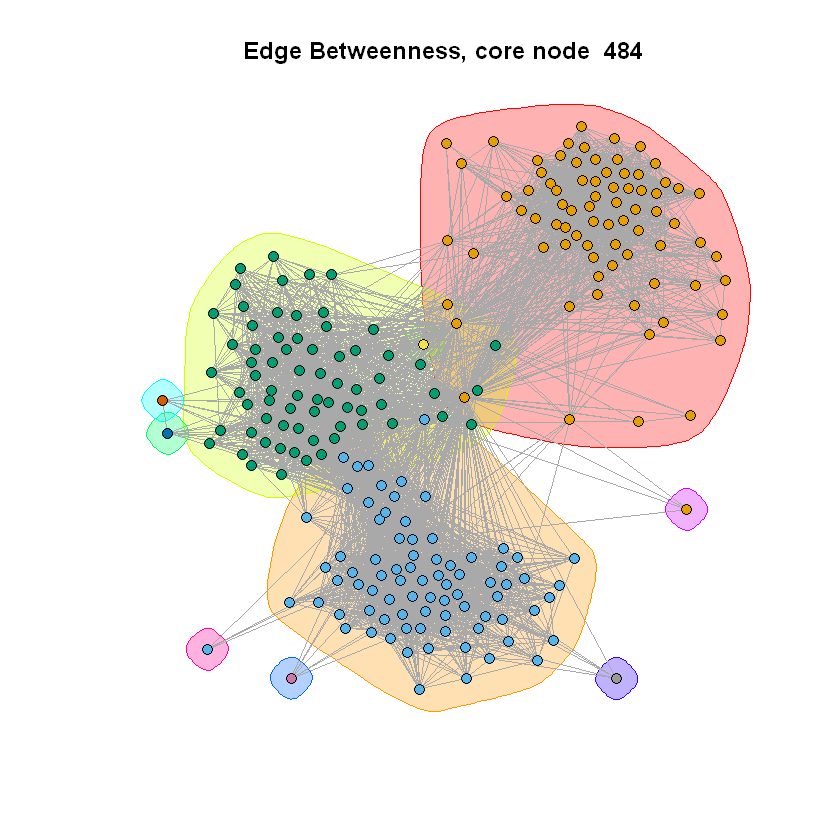

[1] "Question 9 - Fast Greedy Modularity: 0.145531499565493"


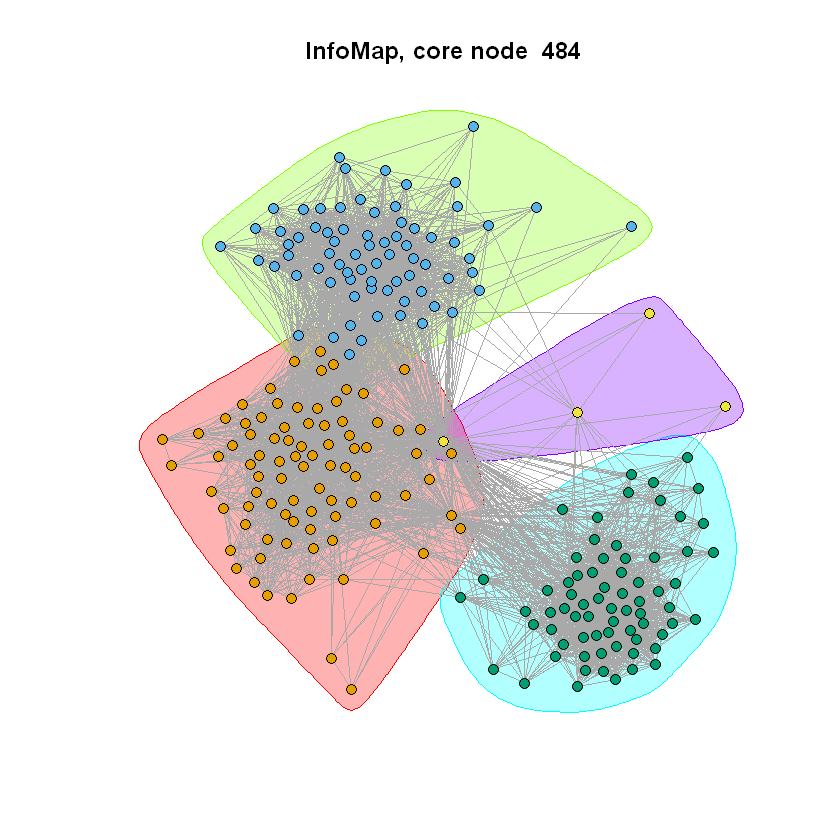

[1] "Question 9 - Edge Betweenness Modularity: 0.027623772388464"


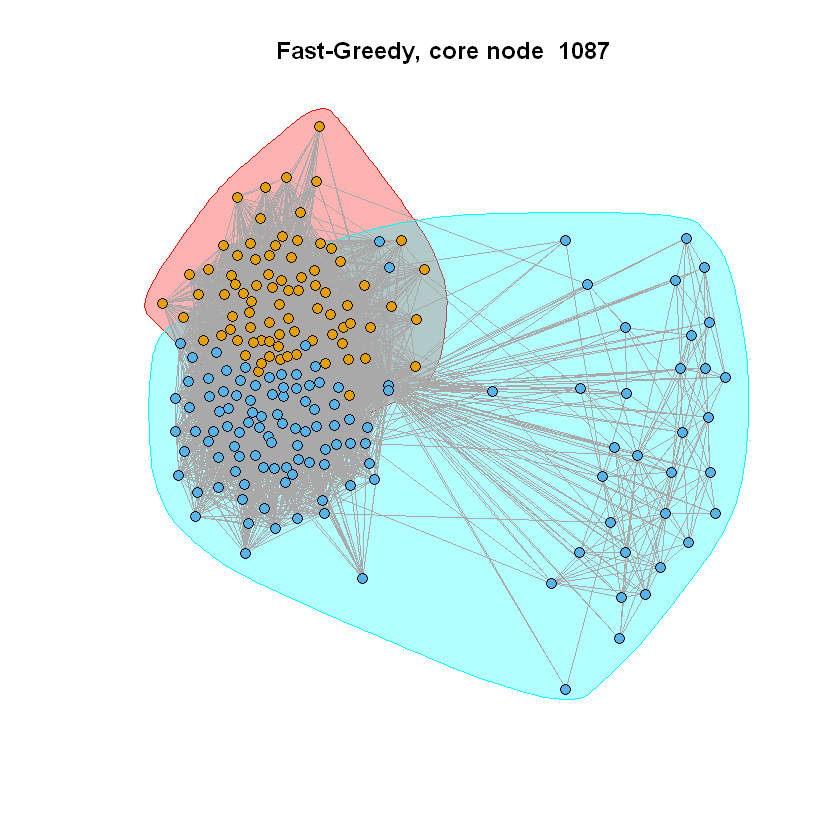

[1] "Question 9 - Infomap Modularity: 0.0269066172233357"


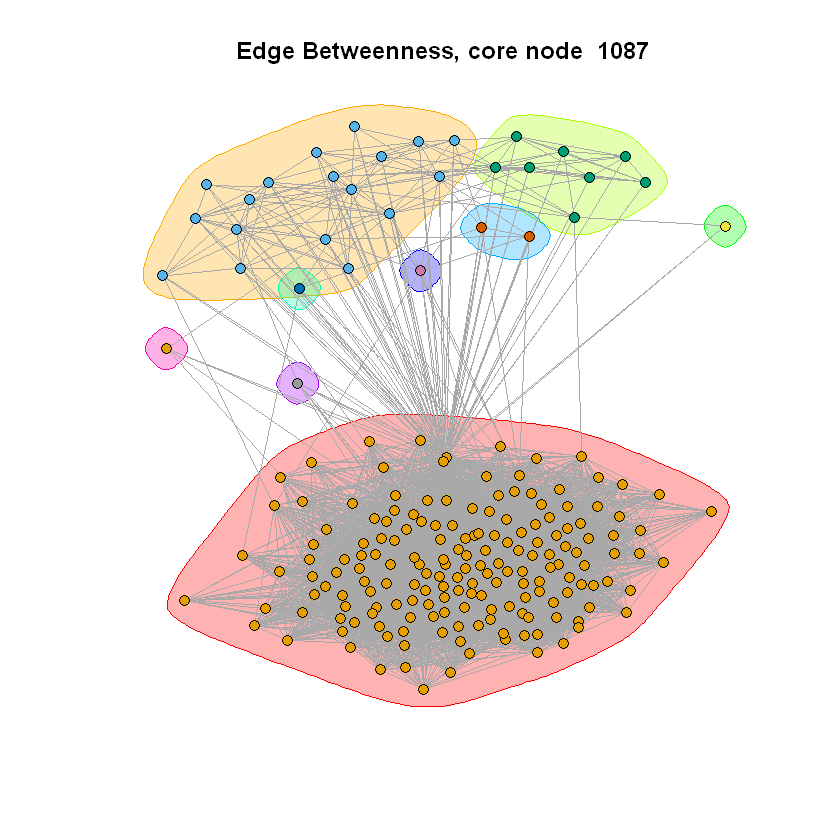

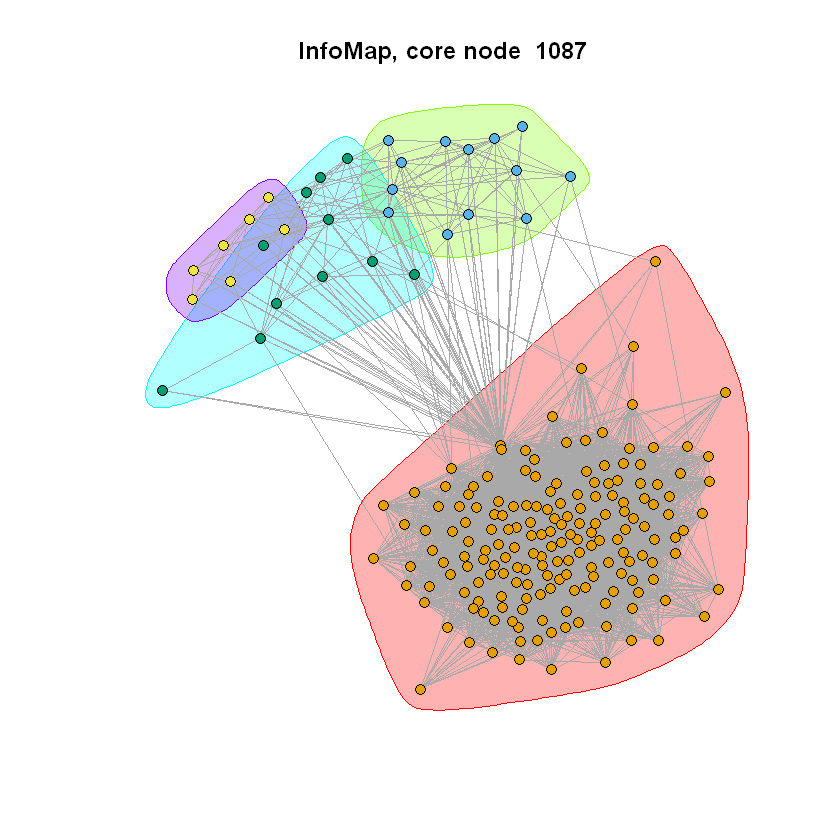

In [39]:
############################ ID CHANGE ######################################
node_ids = c(0,107,348,483,1086)
# http://igraph.org/r/doc/ego.html
ego_graph = make_ego_graph(facebook_edgelist_graph, 1, nodes=c('0','107','348','483','1086'))


for(i in 1:length(node_ids)){
#     personalized_network = induced_subgraph(facebook_edgelist_graph, c(neighbors(facebook_edgelist_graph,toString(i))))
    personalized_network = ego_graph[[i]]
    #Fast Greedy
    fast_greedy = cluster_fast_greedy(personalized_network)
    print(paste('Question 9 - Fast Greedy Modularity:', modularity(fast_greedy)))
    
    plot(personalized_network, mark.groups=groups(fast_greedy), edge.arrow.size=.5, 
         vertex.color=(fast_greedy$membership), vertex.size=4, vertex.label = NA,
        main=paste("Fast-Greedy, core node ",node_id_names[i]))
    
    #Edge-Betweenness
    
    cluster_edge_betweenness = cluster_edge_betweenness(personalized_network)    
    print(paste('Question 9 - Edge Betweenness Modularity:', modularity(cluster_edge_betweenness)))
    
    plot(personalized_network, mark.groups=groups(cluster_edge_betweenness), edge.arrow.size=.5, 
         vertex.color=(cluster_edge_betweenness$membership), vertex.size=4, vertex.label = NA,
        main=paste("Edge Betweenness, core node ",node_id_names[i]))
    
    # 3 Infomap
    info_map = cluster_infomap(personalized_network)    
    print(paste('Question 9 - Infomap Modularity:', modularity(info_map)))
    
    plot(personalized_network, mark.groups=groups(info_map), edge.arrow.size=.5, 
         vertex.color=(info_map$membership), vertex.size=4, vertex.label = NA,
        main=paste("InfoMap, core node ", node_id_names[i]))
}

In [40]:
# QUESTION 10: For each of the core node’s personalized network (use same core nodes as
# Question 9), remove the core node from the personalized network and find the community structure
# of the modified personalized network. Use the same community detection algorithm as Question 9.
# Compare the modularity score of the community structure of the modified personalized network with
# the modularity score of the community structure of the personalized network of Question 9. For
# visualization purpose, display the community structure of the modified personalized network using
# colors. In this question, you should have 15 plots in total.

[1] "Question 10 - Fast Greedy Modularity: 0.44185326886839"
[1] "Question 10 - Edge Betweenness Modularity: 0.41614614203983"


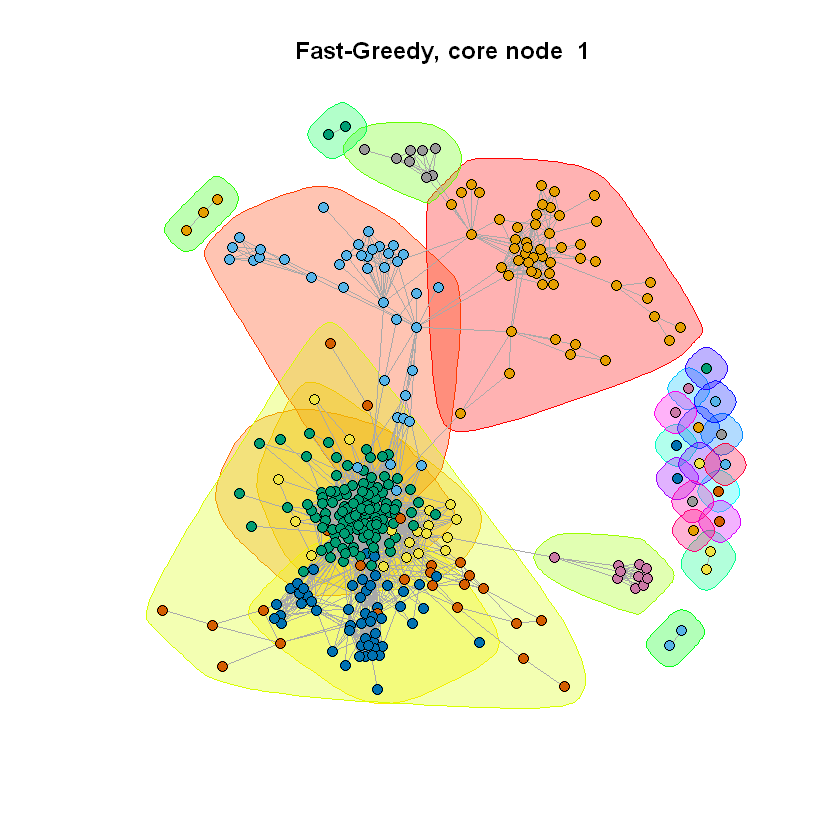

[1] "Question 10 - Edge Betweenness Modularity: 0.418007659453891"


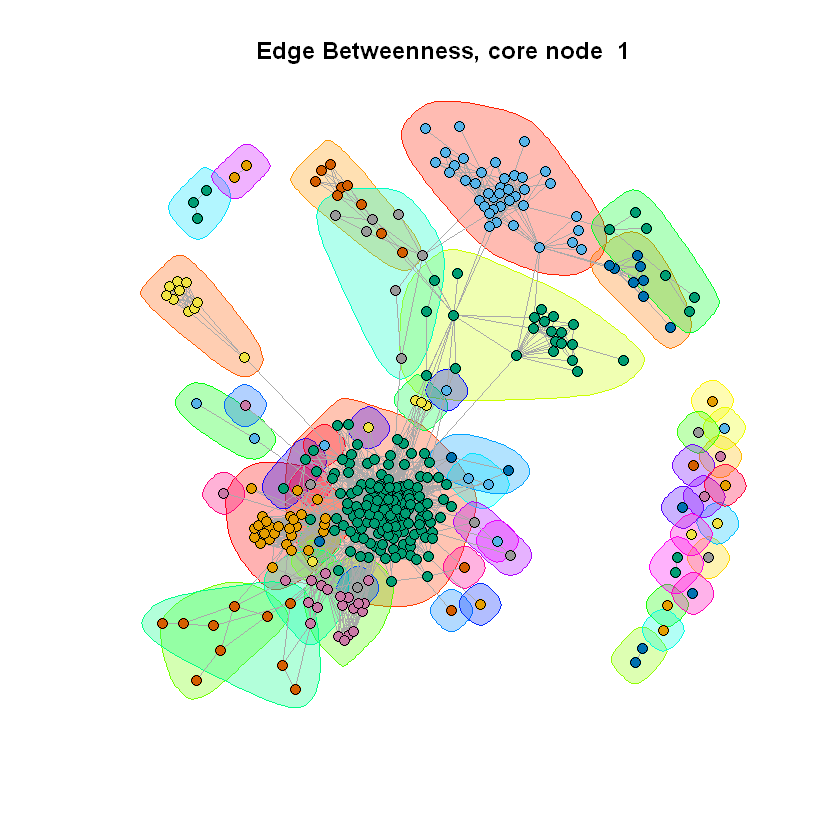

[1] "Question 10 - Fast Greedy Modularity: 0.458146592366146"


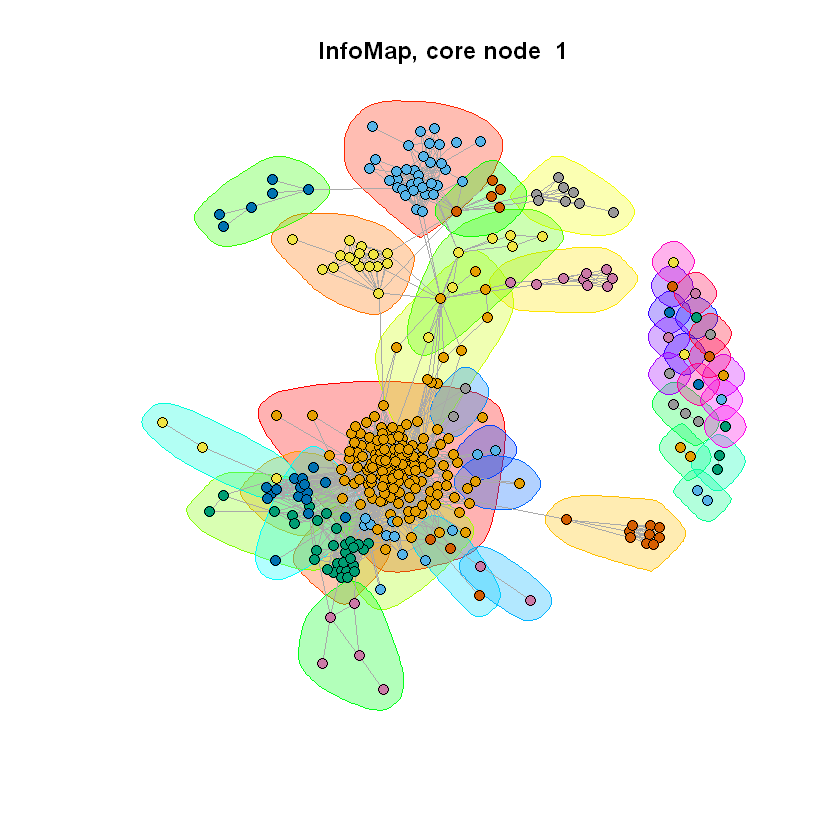

[1] "Question 10 - Edge Betweenness Modularity: 0.521321576382217"


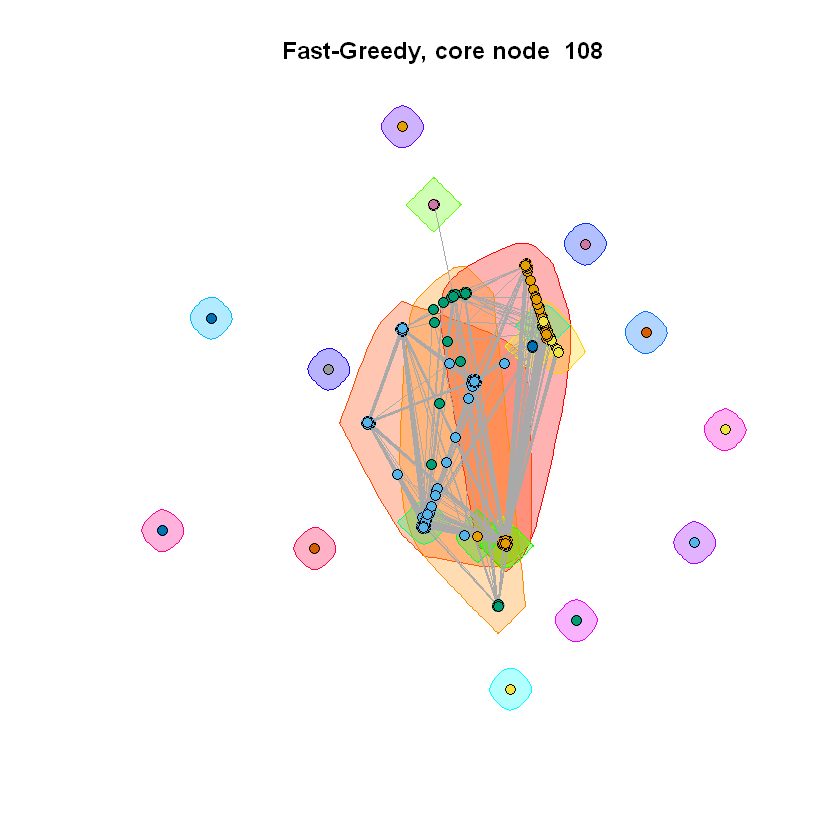

[1] "Question 10 - Edge Betweenness Modularity: 0.518560101318893"


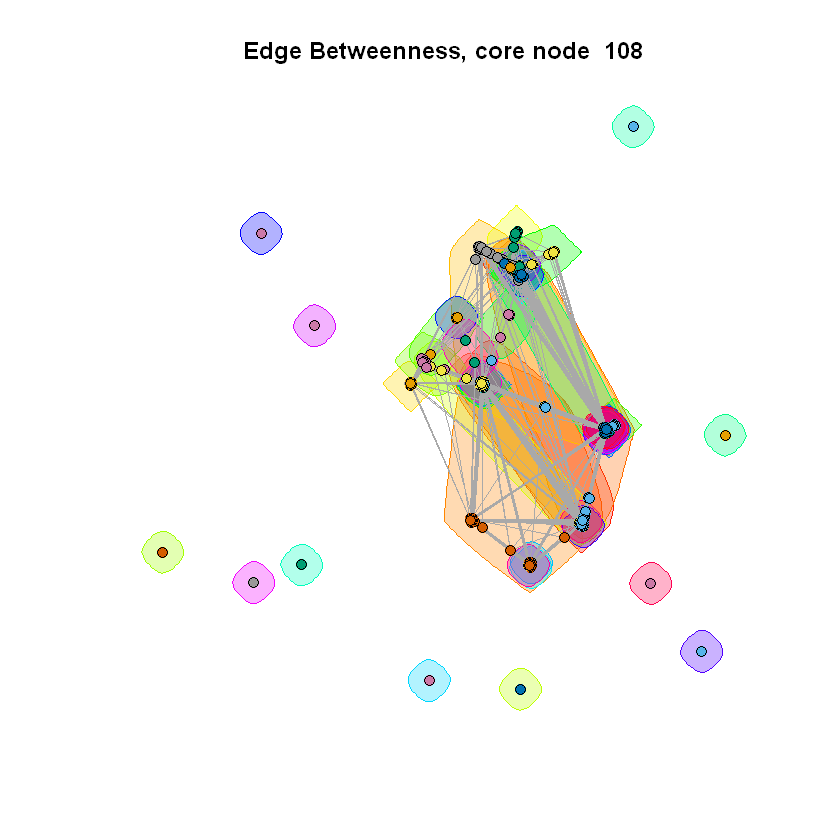

[1] "Question 10 - Fast Greedy Modularity: 0.245691795942674"


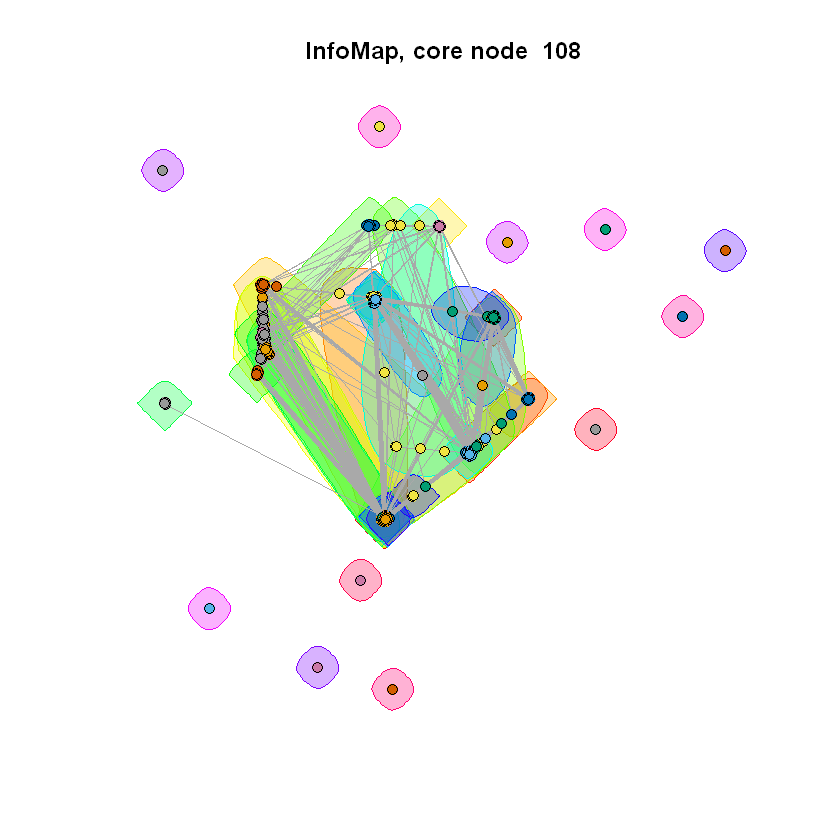

[1] "Question 10 - Edge Betweenness Modularity: 0.150566340187559"


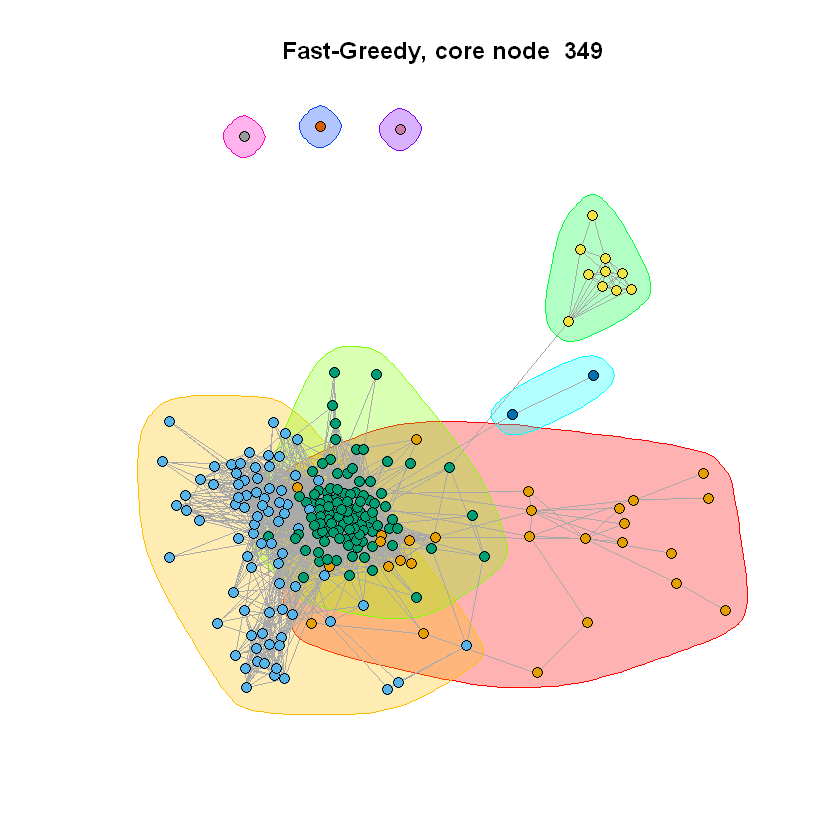

[1] "Question 10 - Edge Betweenness Modularity: 0.244815615942085"


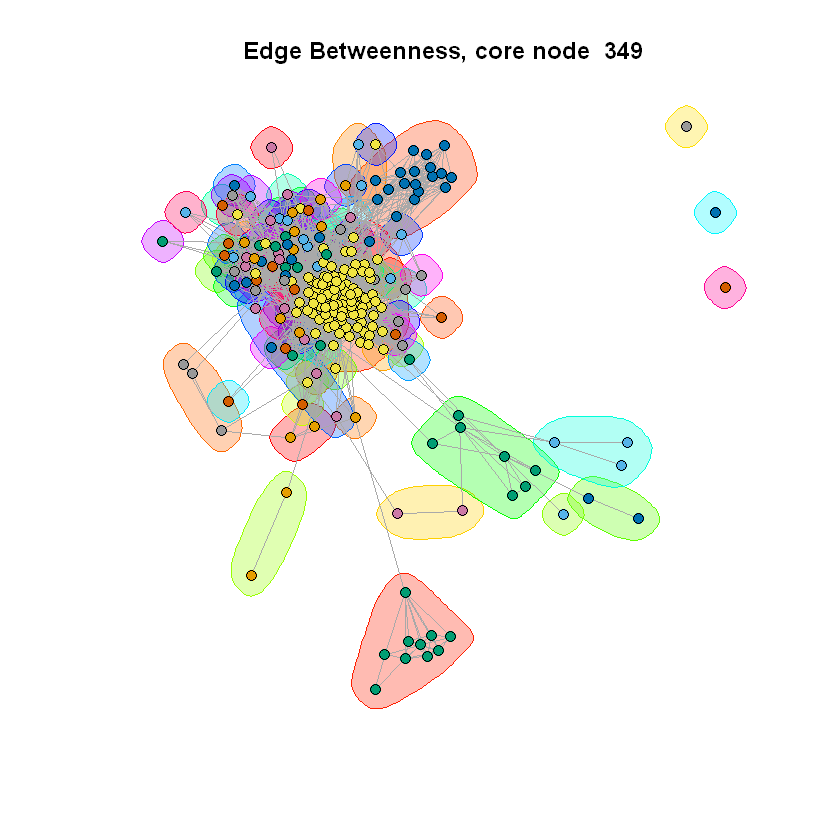

[1] "Question 10 - Fast Greedy Modularity: 0.534214154606172"


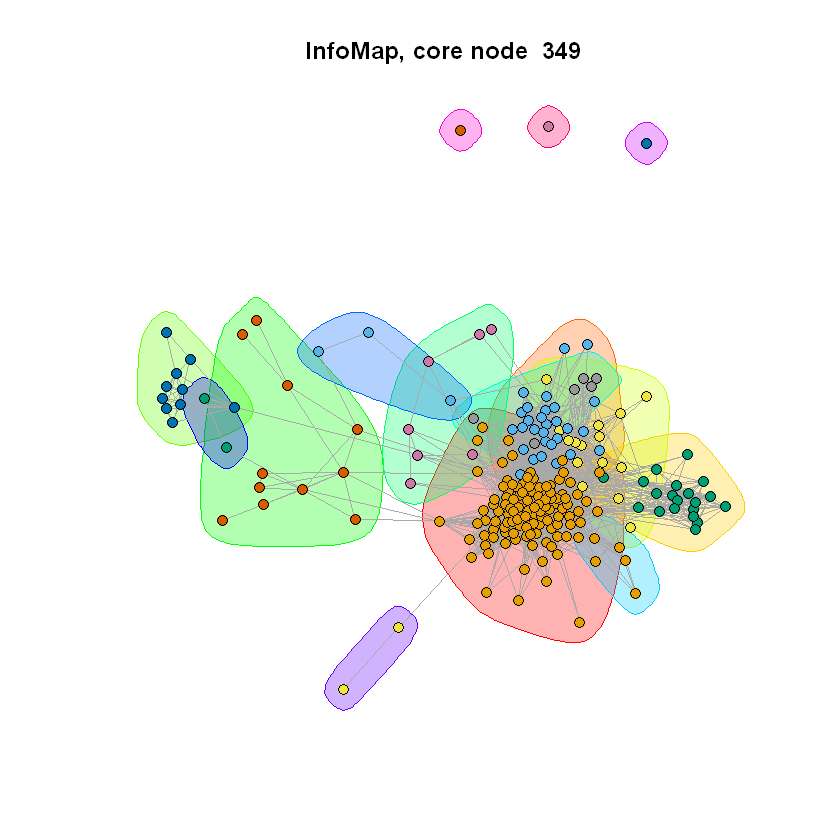

[1] "Question 10 - Edge Betweenness Modularity: 0.515441277123504"


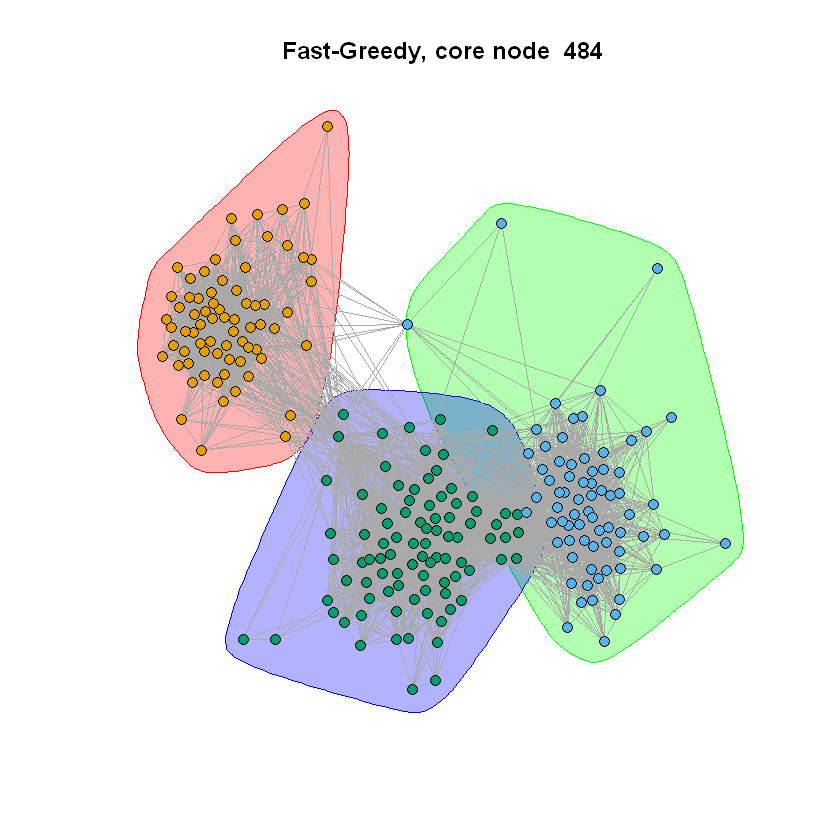

[1] "Question 10 - Edge Betweenness Modularity: 0.543443679279522"


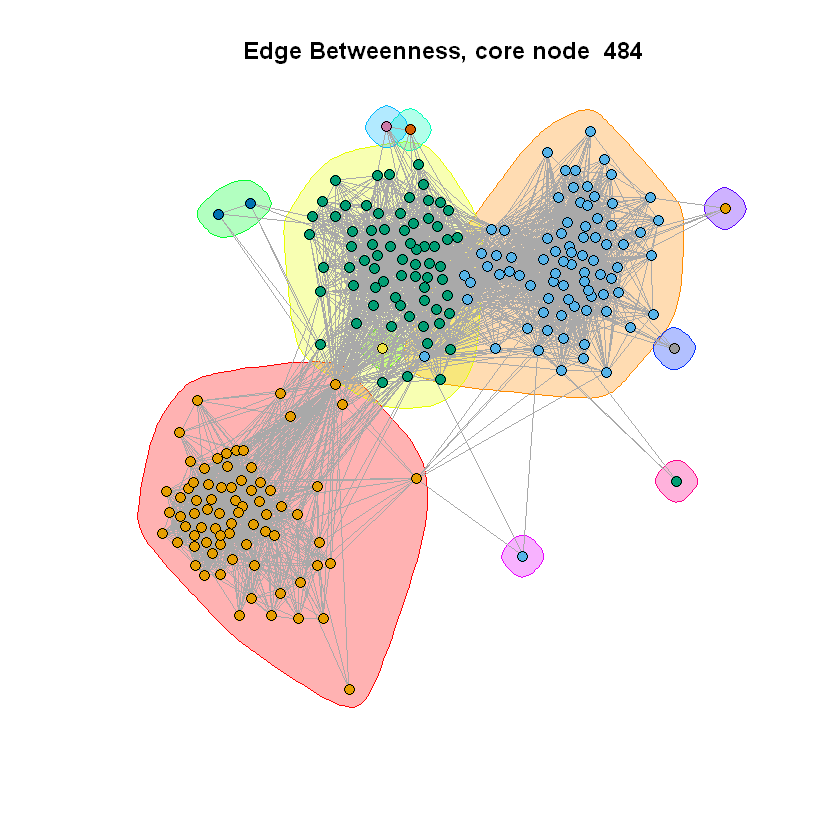

[1] "Question 10 - Fast Greedy Modularity: 0.148195631953499"


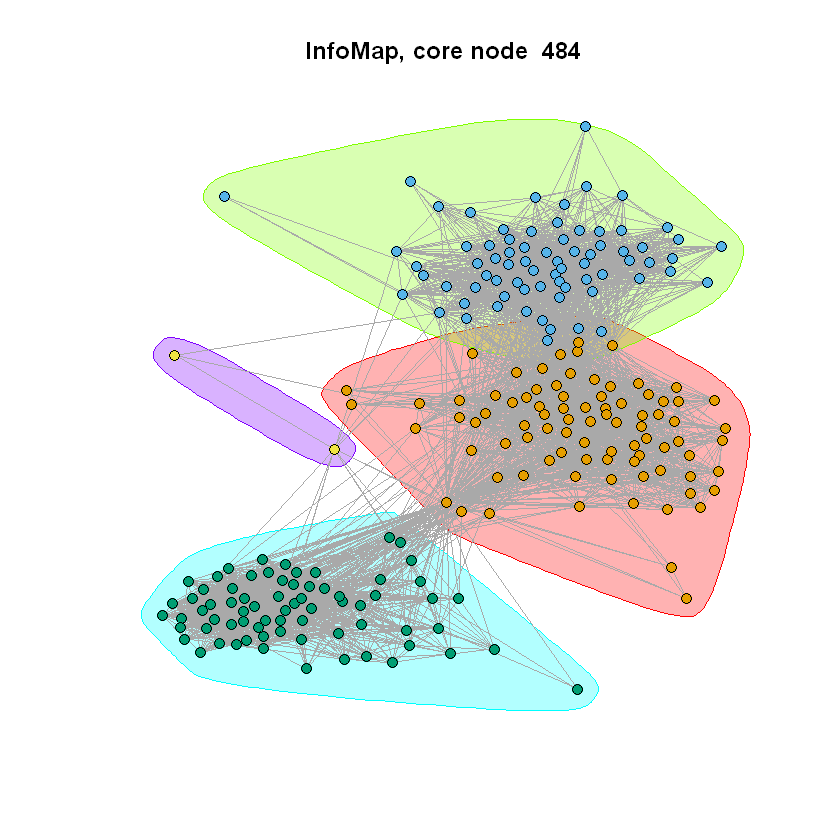

[1] "Question 10 - Edge Betweenness Modularity: 0.0324952980499142"


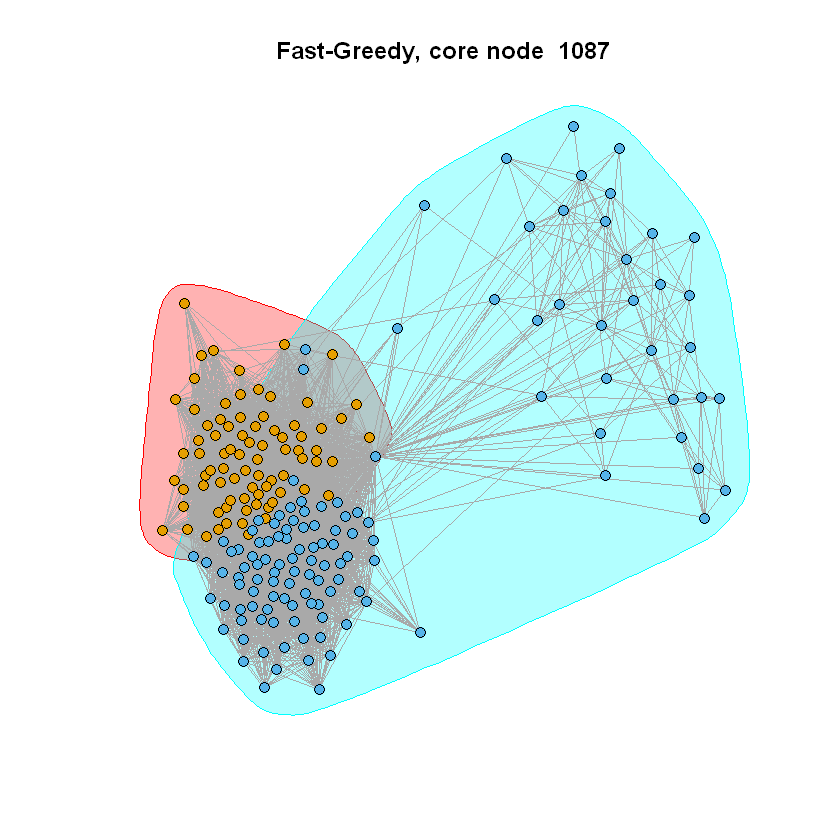

[1] "Question 10 - Edge Betweenness Modularity: 0.0273715944871148"


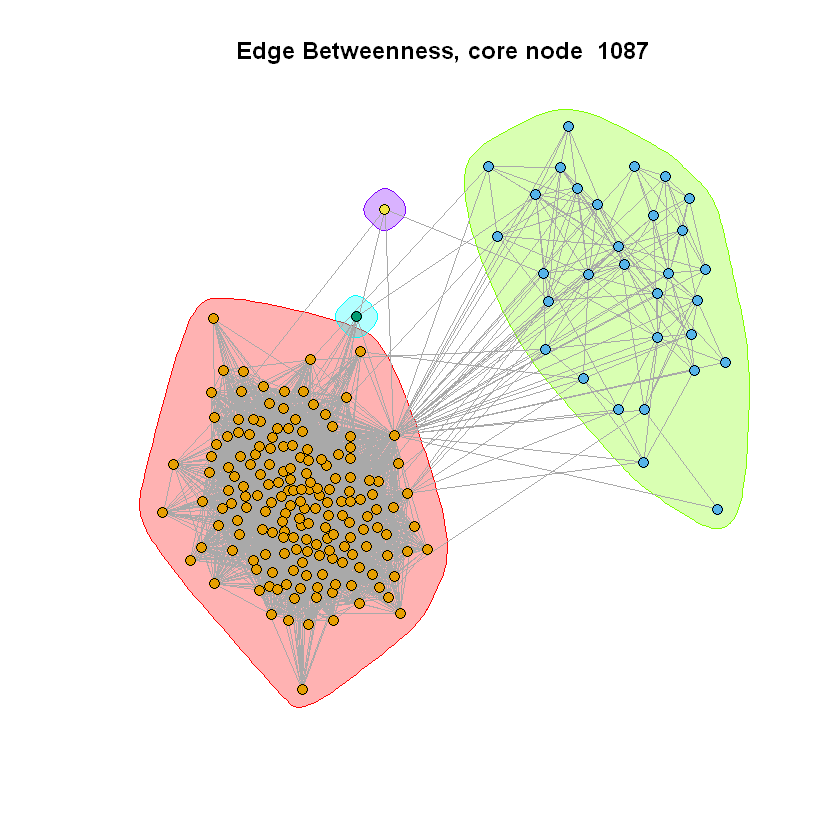

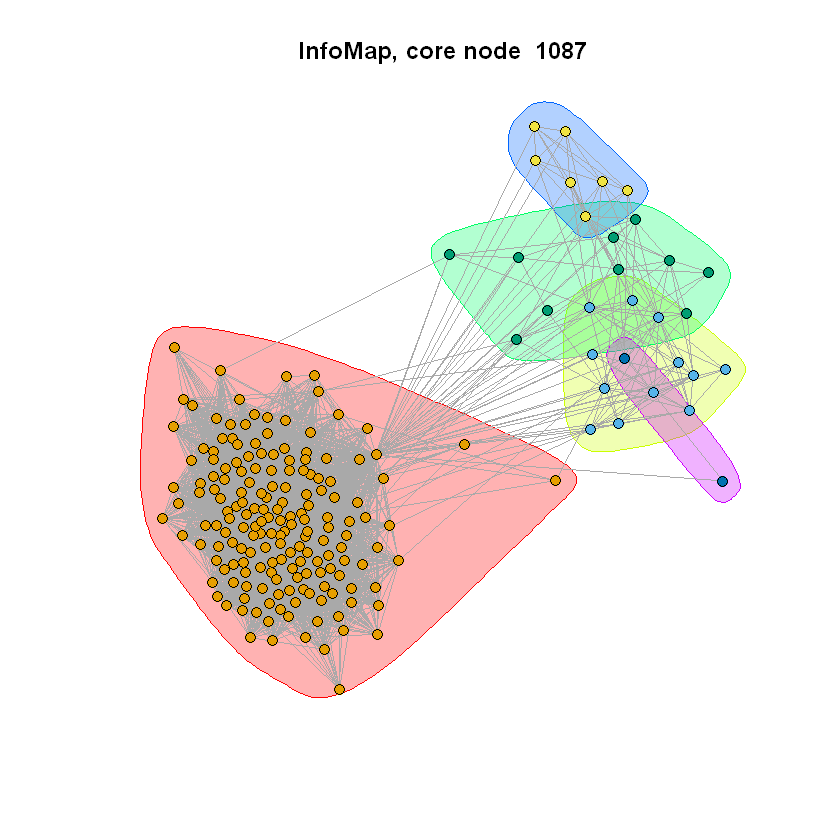

In [41]:
############################ ID CHANGE ######################################
node_ids = c(0,107,348,483,1086)
# http://igraph.org/r/doc/ego.html
ego_graph = make_ego_graph(facebook_edgelist_graph, 1, nodes=c('0','107','348','483','1086'))

for(i in 1:length(node_ids)){
#     personalized_network = induced_subgraph(facebook_edgelist_graph, c(neighbors(facebook_edgelist_graph,toString(i))))
    personalized_network = ego_graph[[i]]
    personalized_network = delete_vertices(personalized_network, toString(node_ids[i]))

    #Fast Greedy
    fast_greedy = cluster_fast_greedy(personalized_network)
    print(paste('Question 10 - Fast Greedy Modularity:', modularity(fast_greedy)))
    
    plot(personalized_network, mark.groups=groups(fast_greedy), edge.arrow.size=.5, 
         vertex.color=(fast_greedy$membership), vertex.size=4, vertex.label = NA,
        main=paste("Fast-Greedy, core node ",node_id_names[i]))
    
    #Edge-Betweenness
    
    cluster_edge_betweenness = cluster_edge_betweenness(personalized_network)    
    print(paste('Question 10 - Edge Betweenness Modularity:', modularity(cluster_edge_betweenness)))
    
    plot(personalized_network, mark.groups=groups(cluster_edge_betweenness), edge.arrow.size=.5, 
         vertex.color=(cluster_edge_betweenness$membership), vertex.size=4, vertex.label = NA,
        main=paste("Edge Betweenness, core node ",node_id_names[i]))
    
    # 3 Infomap
    info_map = cluster_infomap(personalized_network)    
    print(paste('Question 10 - Edge Betweenness Modularity:', modularity(info_map)))
    
    plot(personalized_network, mark.groups=groups(info_map), edge.arrow.size=.5, 
         vertex.color=(info_map$membership), vertex.size=4, vertex.label = NA,
        main=paste("InfoMap, core node ", node_id_names[i]))
}

In [24]:
# QUESTION 11: Write an expression relating the Embeddedness of a node to it’s degree.

In [25]:
# QUESTION 12: For each of the core node’s personalized network (use the same core nodes as
# Question 9), plot the distribution of embeddedness and dispersion. In this question, you will have
# 10 plots.
# Hint Useful function(s): neighbors , intersection , distances

In [8]:
dispersion_embeddedness = function(G, u, v){
    ST = intersection(neighbors(G, u), neighbors(G, v))
    embeddedness = length(ST)
    
    if(embeddedness == 0){
        return(c(0, embeddedness))
    }
    
    mutual_friends = c()
    for(i in 1:length(ST)){
        mutual_friends = c(mutual_friends, ST[i]$name)
    }
    G_prime = delete_vertices(G, c(u,v))
    dist = distances(G_prime, v=mutual_friends, to=mutual_friends)
    
    total = 0
    for(i in 1:length(dist)){
        if(dist[i] > 2){
            total = total + 1
        }
    }

    dispersion = total/2
    
    return(c(dispersion, embeddedness))
}

[1] "Question 12"


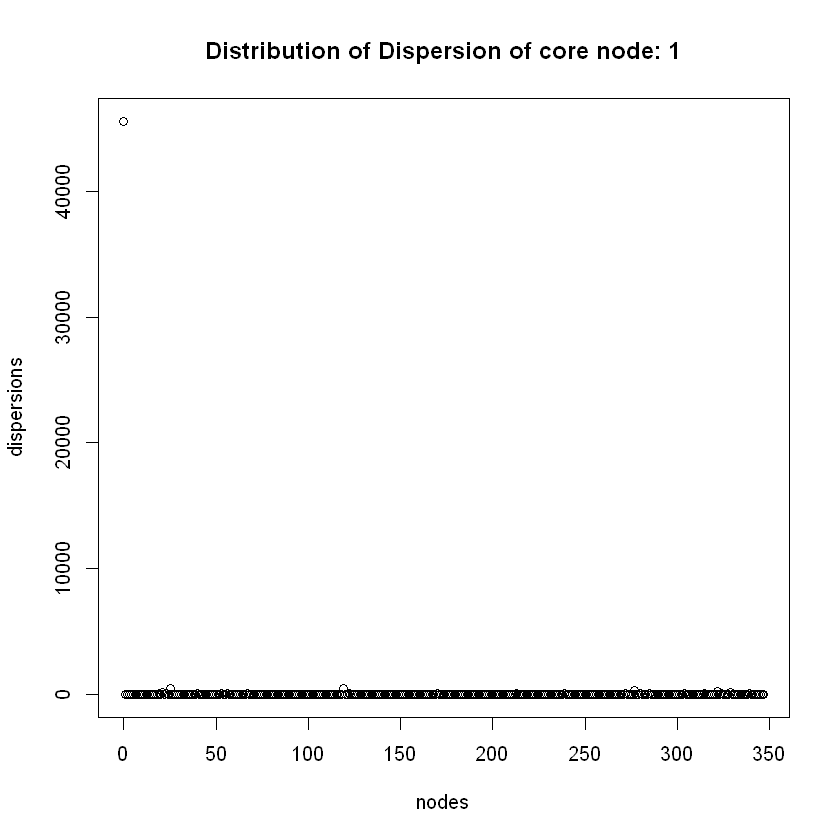

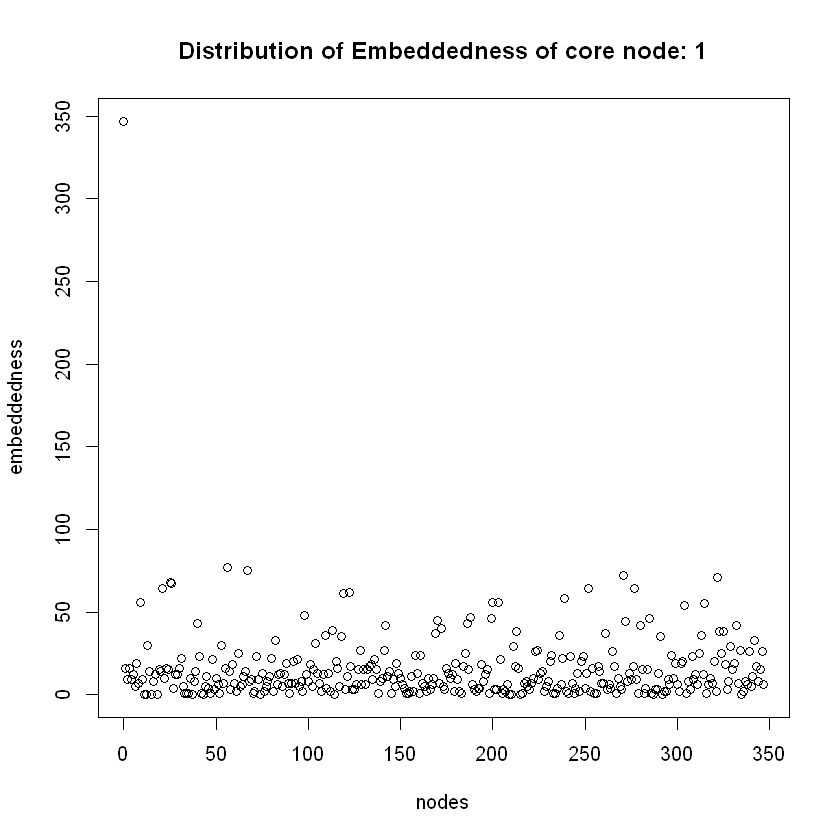

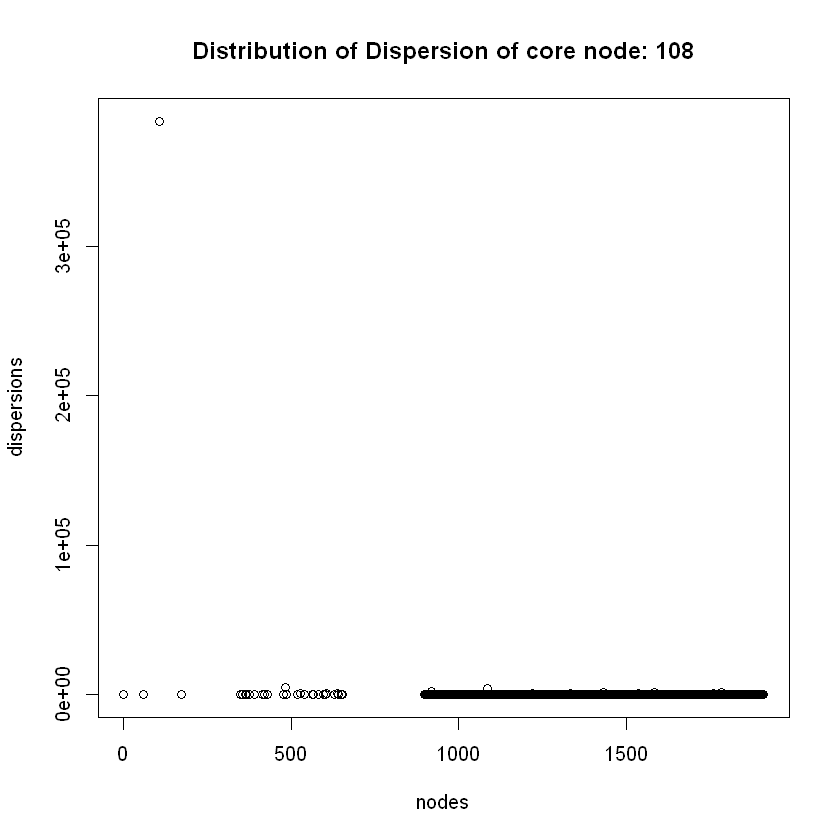

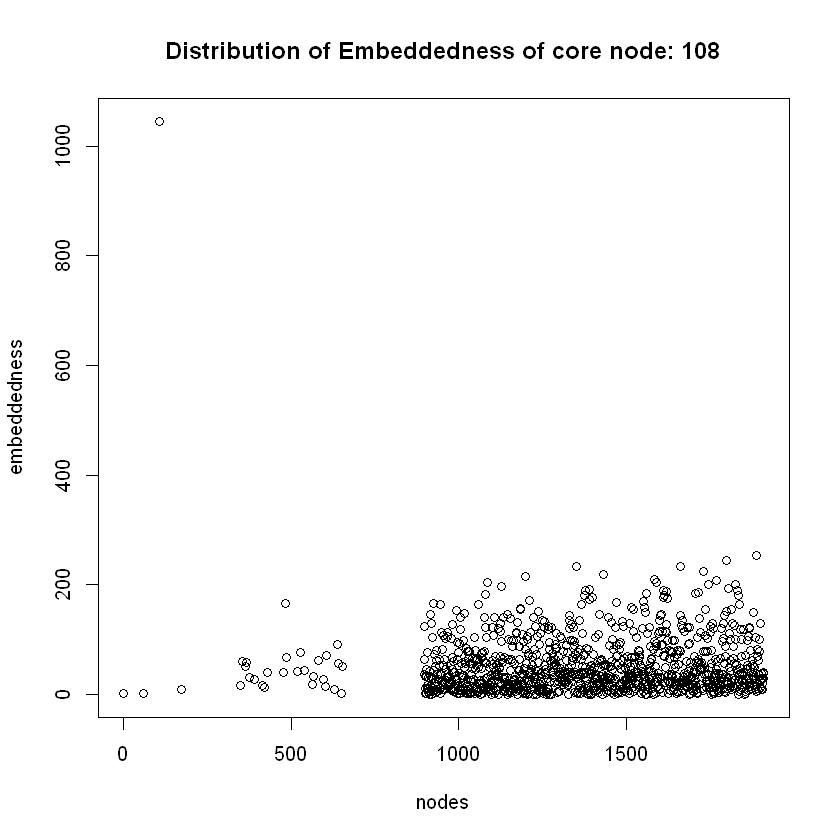

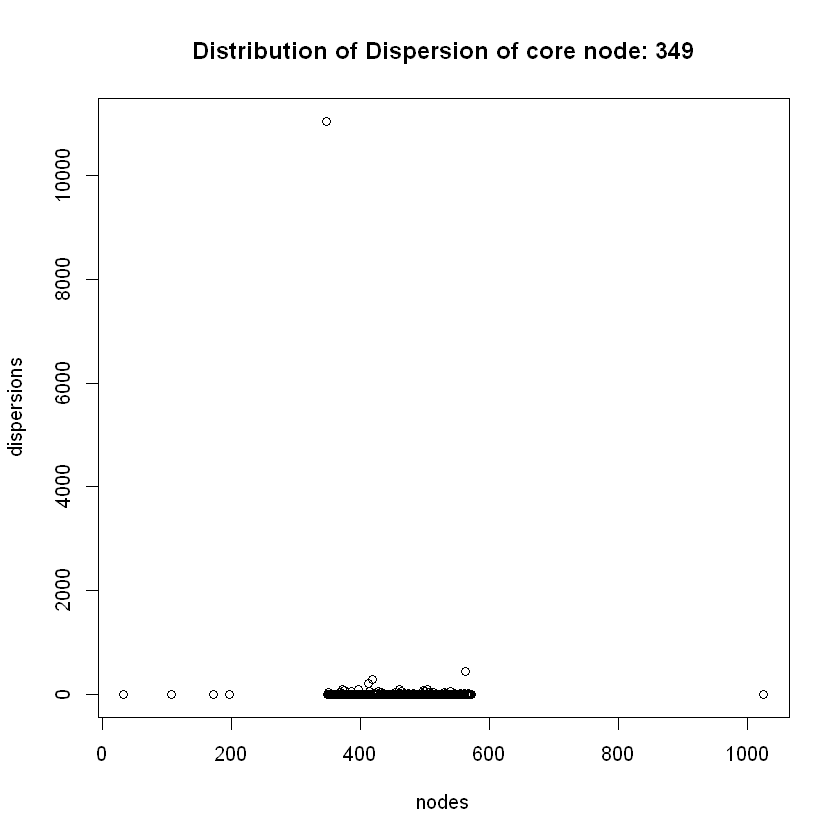

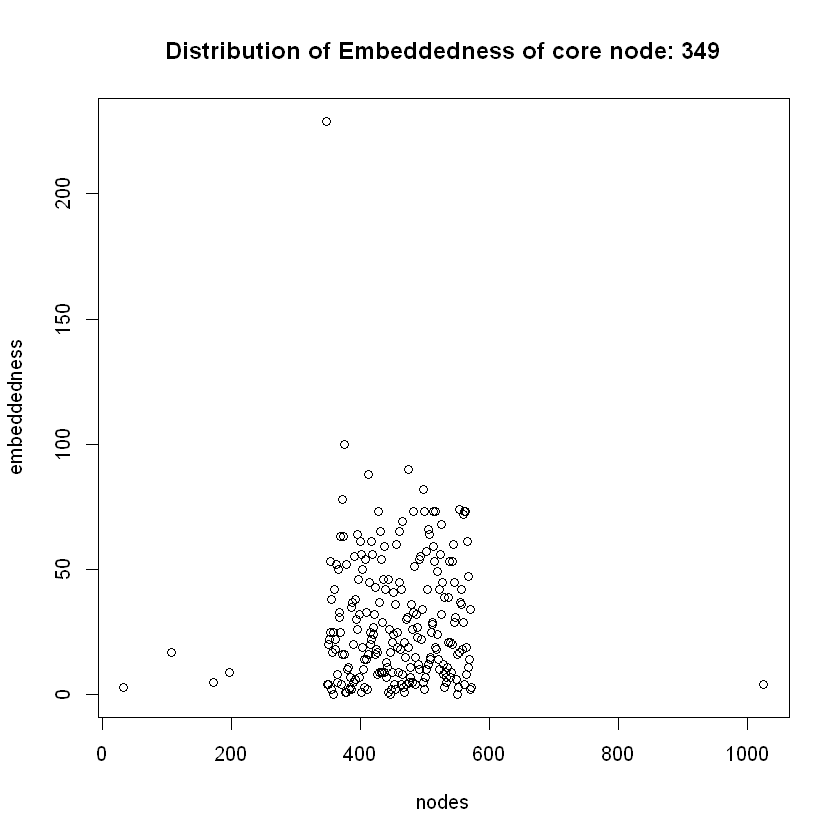

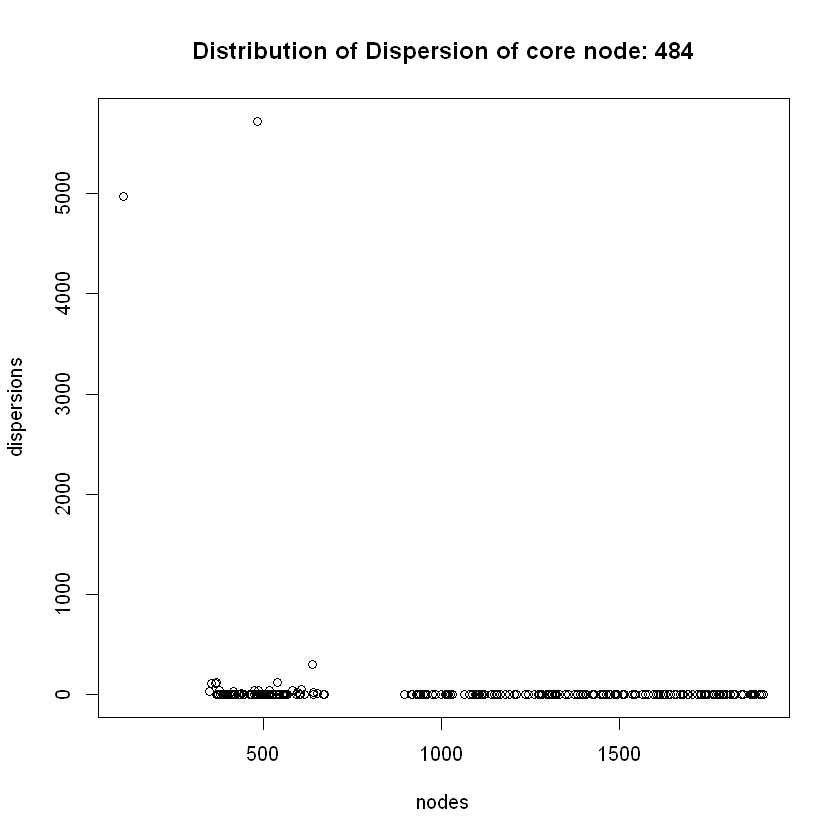

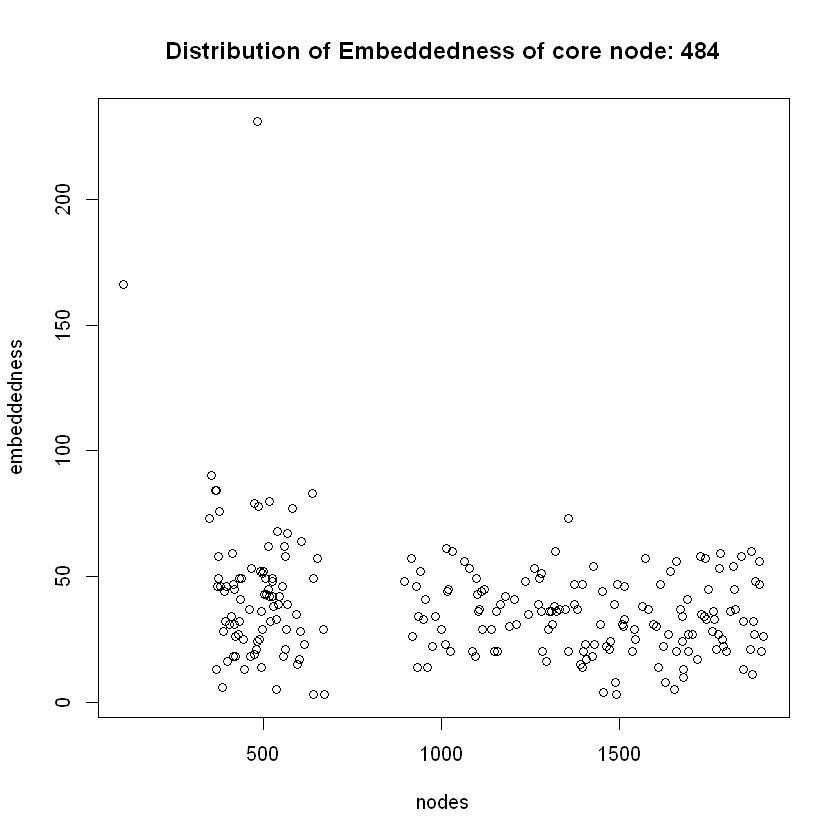

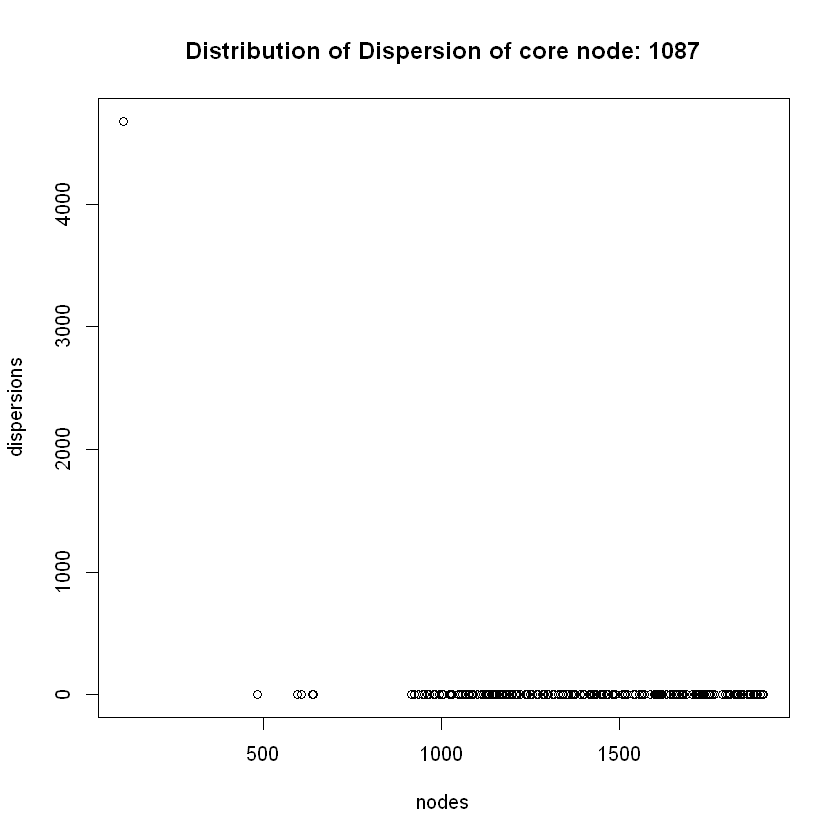

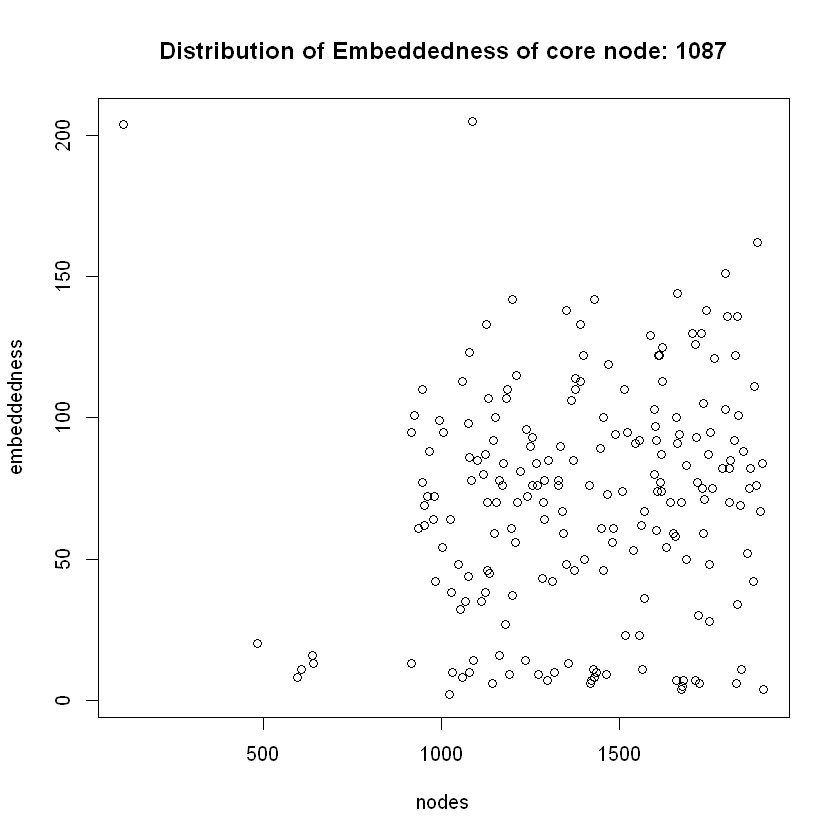

In [9]:
############################ ID CHANGE ######################################

print('Question 12')
node_ids = c(0,107,348,483,1086)
# http://igraph.org/r/doc/ego.html
ego_graph = make_ego_graph(facebook_edgelist_graph, 1, nodes=c('0','107','348','483','1086'))

for(i in 1:length(node_ids)){
#     personalized_network = induced_subgraph(facebook_edgelist_graph, c(neighbors(facebook_edgelist_graph,toString(i))))
    personalized_network = ego_graph[[i]]
#     plot(personalized_network)
    subgraph_nodes = c(V(personalized_network)$name)
    dispersions = c()
    embeddedness = c()
    nodes = c()
    
    for(n in subgraph_nodes){
        result = dispersion_embeddedness(personalized_network, toString(node_ids[i]), toString(n))
        
        dispersions = c(dispersions, result[1])
        embeddedness = c(embeddedness, result[2])
        nodes = c(nodes, n)
    }
    plot(nodes, dispersions, main=paste('Distribution of Dispersion of core node:',node_id_names[i]))
    plot(nodes, embeddedness, main=paste('Distribution of Embeddedness of core node:',node_id_names[i]))

}

In [10]:
# QUESTION 13: For each of the core node’s personalized network, plot the community structure
# of the personalized network using colors and highlight the node with maximum dispersion. Also,
# highlight the edges incident to this node. To detect the community structure, use Fast-Greedy
# algorithm. In this question, you will have 5 plots.

[1] "Question 13"
[1] "25"
[1] "483"


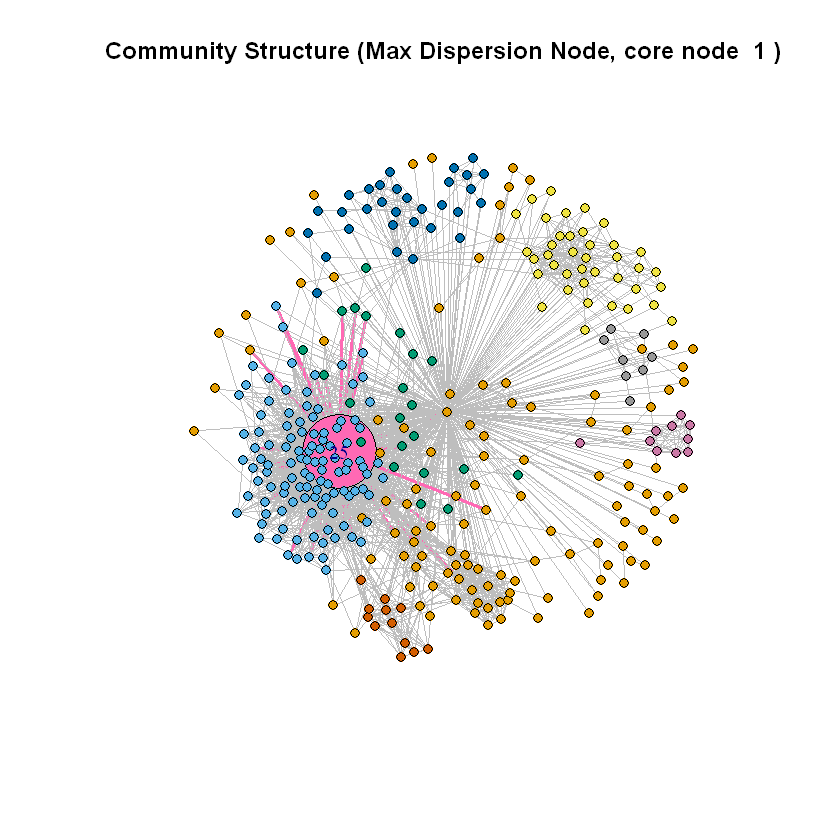

[1] "563"


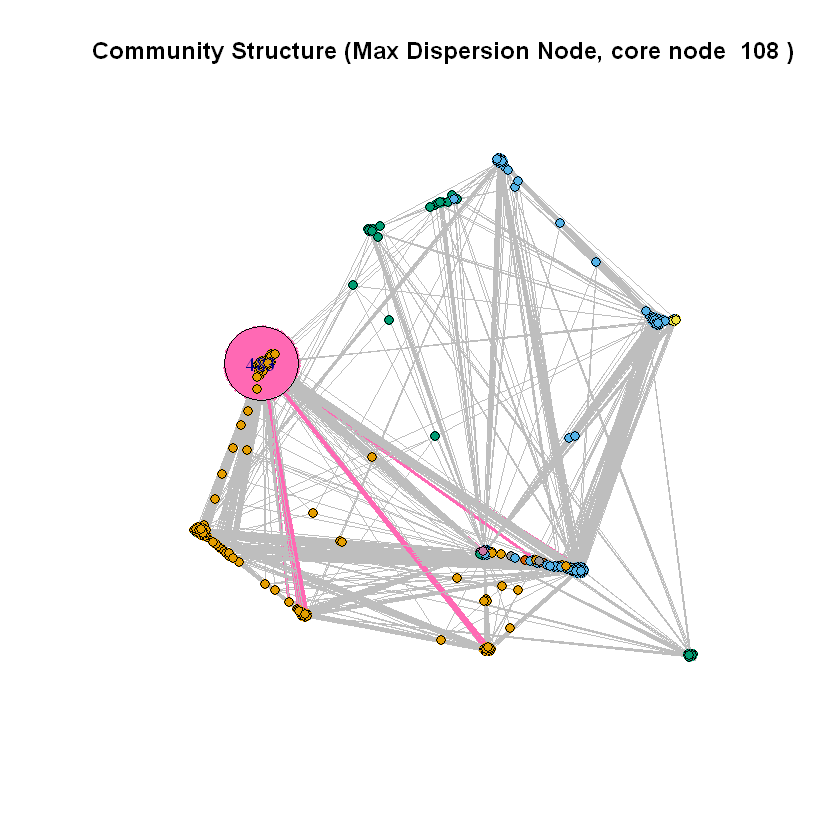

[1] "107"


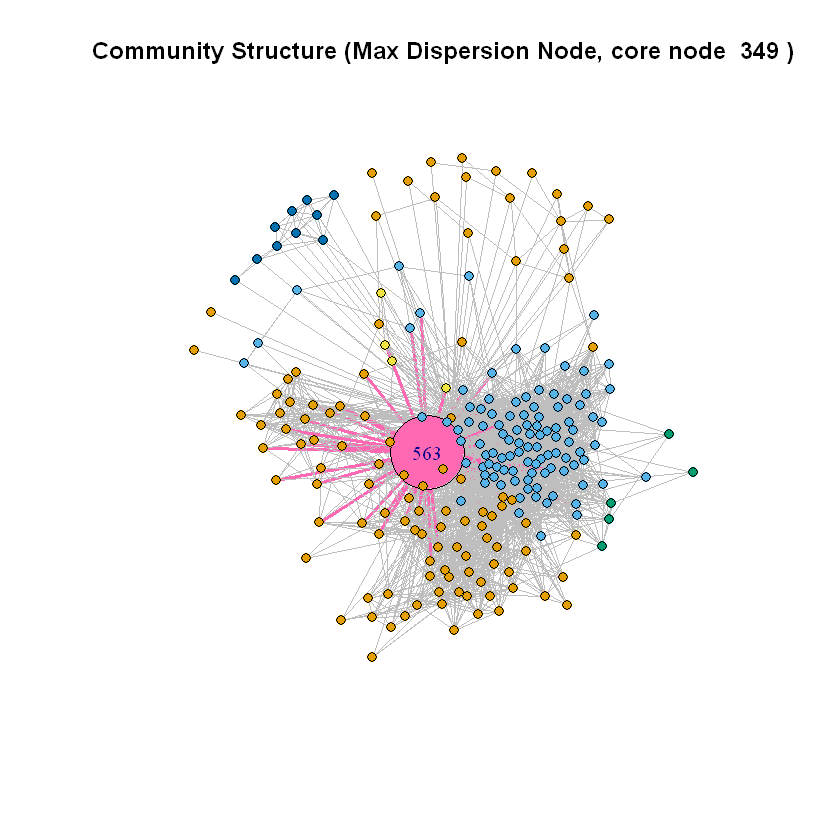

[1] "107"


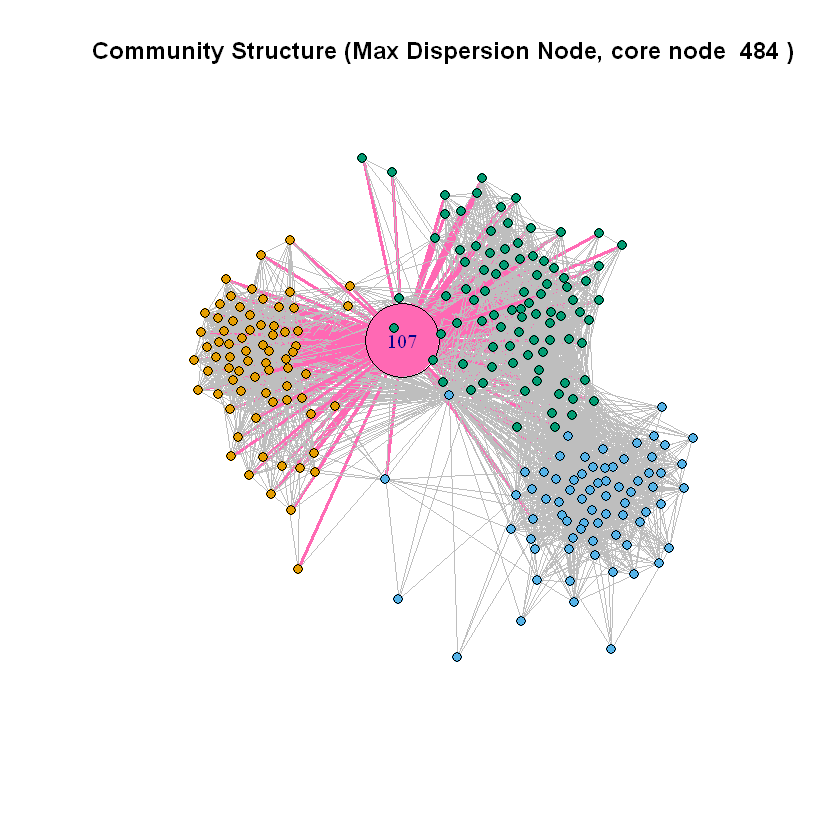

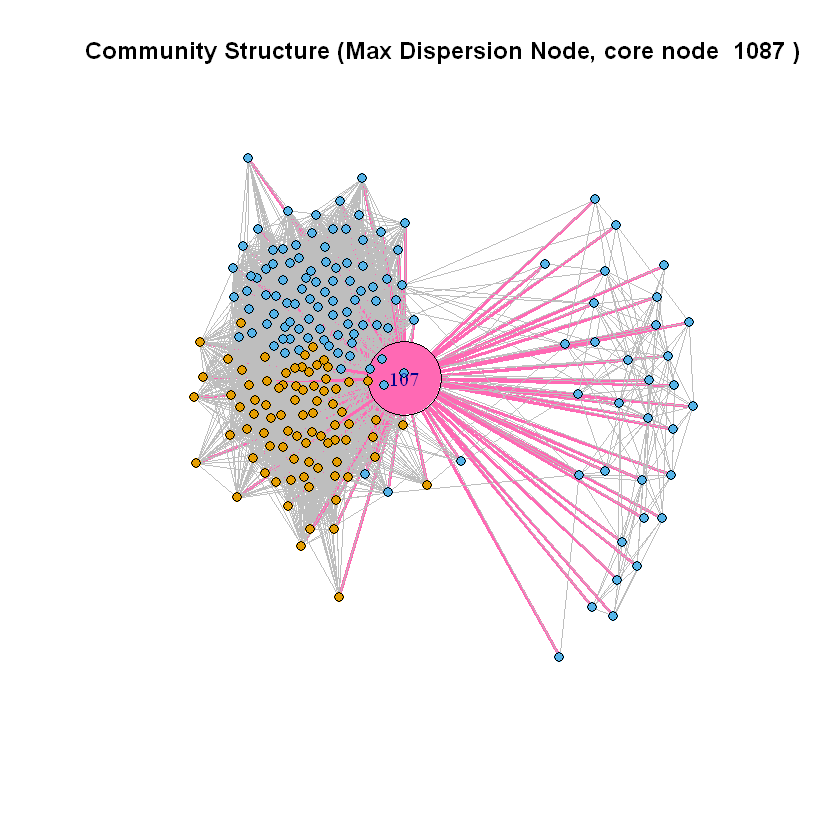

In [25]:
############################ ID CHANGE ######################################

print('Question 13')
node_ids = c(0,107,348,483,1086)
# http://igraph.org/r/doc/ego.html
ego_graph = make_ego_graph(facebook_edgelist_graph, 1, nodes=c('0','107','348','483','1086'))

for(i in 1:length(node_ids)){
#     personalized_network = induced_subgraph(facebook_edgelist_graph, c(neighbors(facebook_edgelist_graph,toString(i))))
    personalized_network = ego_graph[[i]]
#     plot(personalized_network)
    subgraph_nodes = c(V(personalized_network)$name)
#     dispersions = c()
#     embedednesses = c()
    max_node =  NA
    max_dispersion = 0
    
    for(n in subgraph_nodes){
        result = dispersion_embeddedness(personalized_network, toString(node_ids[i]), toString(n))
        if(result[1] > max_dispersion && n != toString(node_ids[i])){
            max_dispersion = result[1]
            max_node = n
        }
    }
    personalized_community = fastgreedy.community(personalized_network)
    
#     node_color = personalized_community$membership
#     node_size = rep(3,length(node_color))
    edge_color = rep("gray", length(E(personalized_network)))
    edge_weight = rep(0.5, length(E(personalized_network)))
    node_color = rep(personalized_community$membership, length(V(personalized_network)))
    node_size = rep(4, length(V(personalized_network)))
    node_label = rep(NA, length(V(personalized_network)))

    edge_color[which(get.edgelist(personalized_network, name = TRUE)[,1] == max_node | 
                     get.edgelist(personalized_network, name = TRUE)[,2] == max_node)] = "hotpink";
    
    edge_weight[which(get.edgelist(personalized_network, name = TRUE)[,1] == max_node |  
                      get.edgelist(personalized_network, name = TRUE)[,2] == max_node)] = 3;
    
    node_color[which(V(personalized_network)$name == max_node)] = "hotpink";
    
    node_size[which(V(personalized_network)$name == max_node)] = 30;
    
    node_label[which(V(personalized_network)$name == max_node)] = max_node;
#     node_size[max_node] = 5
#     node_color[max_node] = 7
#     node_size[node_ids[i]] = 4
#     node_color[node_ids[i]] = 0
#     print(get.edgelist(personalized_network, name = FALSE))
#     print(max_node)
#     print(get.edgelist(personalized_network, name = TRUE)[,1])
#     print(get.edgelist(personalized_network, name = FALSE)[,2])
        
    
#     print(which(get.edgelist(personalized_network, name = FALSE)[,1] == max_node | 
#                      get.edgelist(personalized_network, name = FALSE)[,2] == max_node))
    
    print(max_node)
    plot(personalized_network, vertex.size = node_size, 
                edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, vertex.label=node_label,
               main = paste("Community Structure (Max Dispersion Node, core node ",node_id_names[i],")"))

#         plot(personalized_network, mark.groups=groups(fast_greedy), edge.arrow.size=.5, 
#          vertex.color=(fast_greedy$membership), vertex.size=15, 
#         main=paste("Fast-Greedy, core node ",node_ids[i]))
    
}

In [28]:
# QUESTION 14: Repeat Question 13, but now highlight the node with maximum embeddedness
# and the node with maximum dispersion
# embeddedness . Also, highlight the edges incident to these nodes

[1] "Question 14"
[1] "56"
[1] "119"
[1] "1888"
[1] "483"


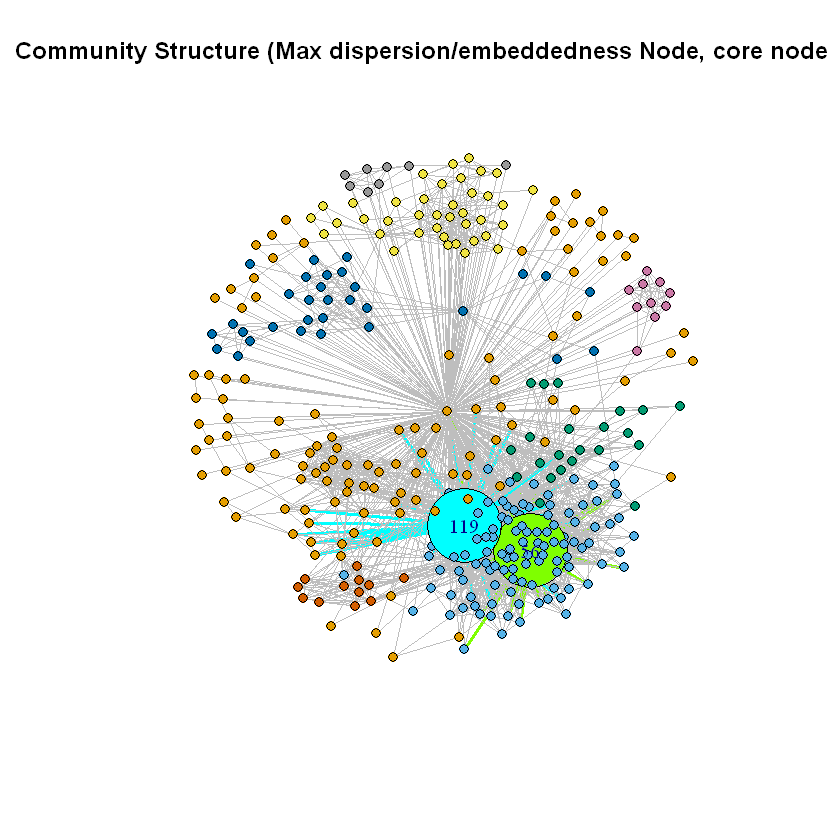

[1] "376"
[1] "563"


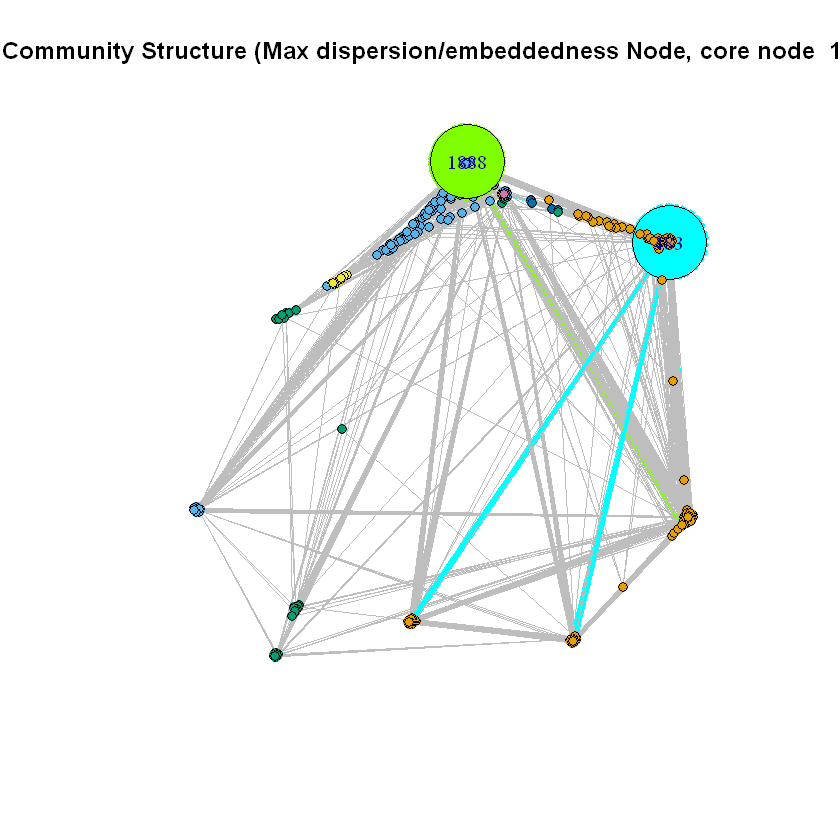

[1] "107"
[1] "107"


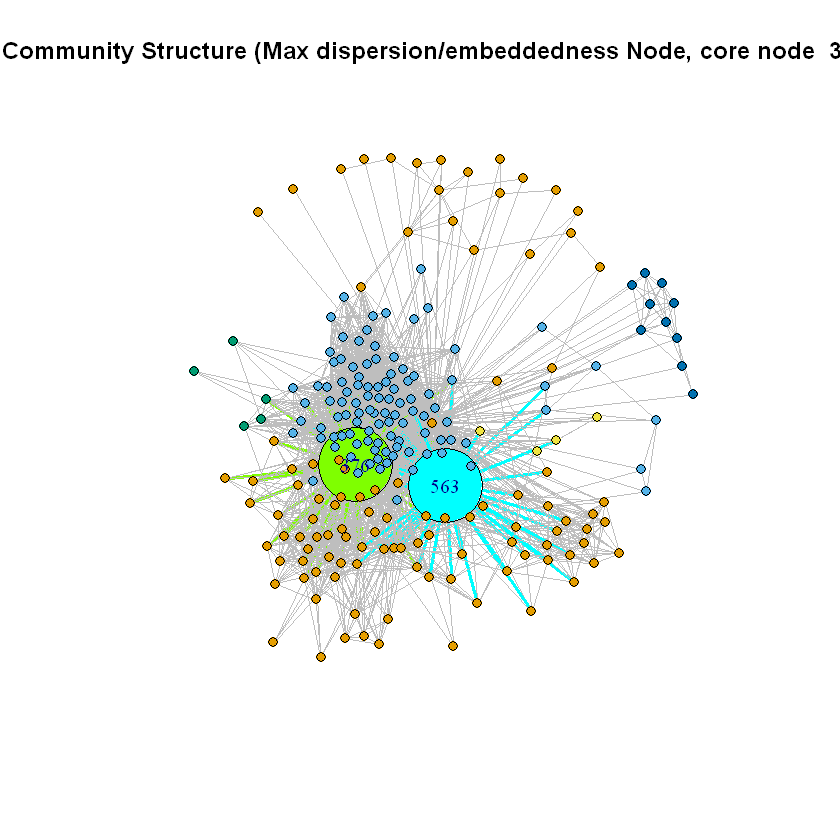

[1] "107"
[1] "107"


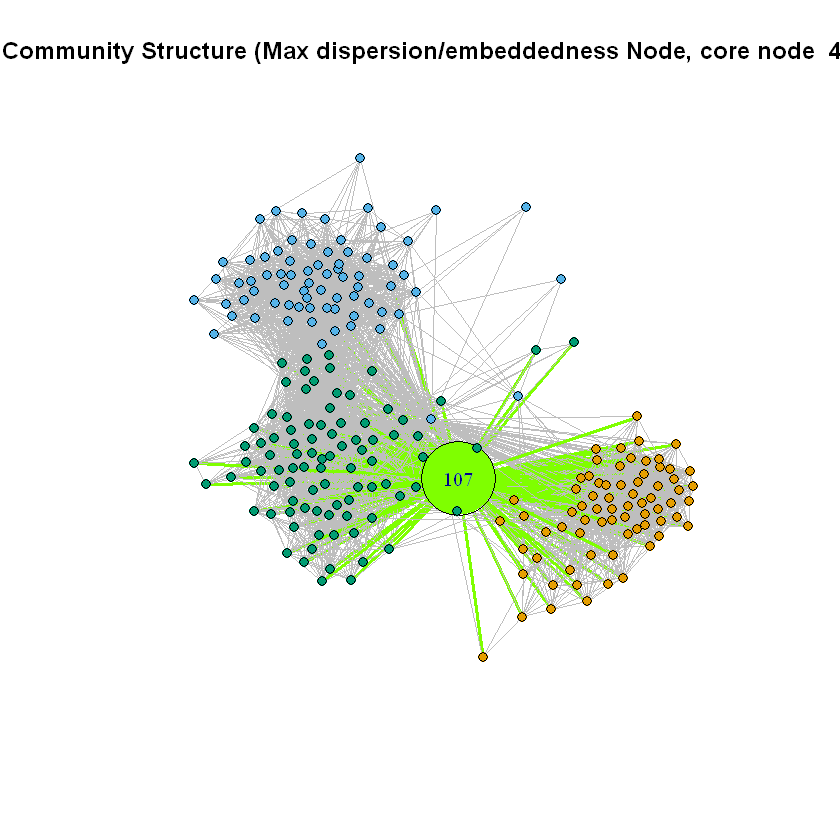

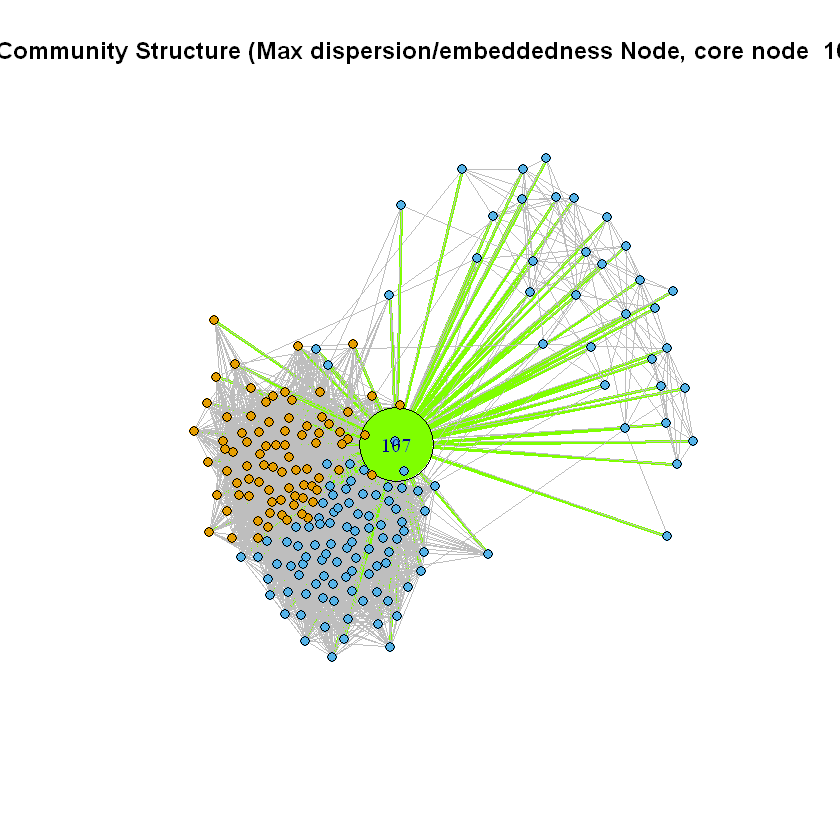

In [31]:
print('Question 14')
node_ids = c(0,107,348,483,1086)
# http://igraph.org/r/doc/ego.html
ego_graph = make_ego_graph(facebook_edgelist_graph, 1, nodes=c('0','107','348','483','1086'))

for(i in 1:length(node_ids)){
#     personalized_network = induced_subgraph(facebook_edgelist_graph, c(neighbors(facebook_edgelist_graph,toString(i))))
    personalized_network = ego_graph[[i]]
#     plot(personalized_network)
    subgraph_nodes = c(V(personalized_network)$name)
#     dispersions = c()
#     embedednesses = c()
    
    max_enode =  NA
    max_embeddedness = 0
    max_denode = NA
    max_dispersion_embeddedness = 0
    
    for(n in subgraph_nodes){
        result = dispersion_embeddedness(personalized_network, toString(node_ids[i]), toString(n))
        
        if(result[2] > max_embeddedness && n != toString(node_ids[i])){
            max_embeddedness = result[2]
            max_enode = n
        }
        if(result[2] != 0 && (result[1]/result[2]) > max_dispersion_embeddedness && n != toString(node_ids[i])){
            max_dispersion_embeddedness = result[1]/result[2]
            max_denode = n
        }
        
#         dispersions = c(dispersions, result[1])
#         embedednesses = c(embedednesses, result[2])
    }
    personalized_community = fastgreedy.community(personalized_network)
    
#     node_color = personalized_community$membership
#     node_size = rep(3,length(node_color))
    edge_color = rep("gray", length(E(personalized_network)))
    edge_weight = rep(0.5, length(E(personalized_network)))
    node_color = rep(personalized_community$membership, length(V(personalized_network)))
    node_size = rep(4, length(V(personalized_network)))
    node_label = rep(NA, length(V(personalized_network)))
    
    edge_color[which(get.edgelist(personalized_network, name = TRUE)[,1] == max_denode | 
                     get.edgelist(personalized_network, name = TRUE)[,2] == max_denode)] = "cyan";
    edge_color[which(get.edgelist(personalized_network, name = TRUE)[,1] == max_enode | 
                     get.edgelist(personalized_network, name = TRUE)[,2] == max_enode)] = "chartreuse";

    edge_weight[which(get.edgelist(personalized_network, name = TRUE)[,1] == max_denode |  
                      get.edgelist(personalized_network, name = TRUE)[,2] == max_denode |
                      get.edgelist(personalized_network, name = TRUE)[,1] == max_enode |
                      get.edgelist(personalized_network, name = TRUE)[,2] == max_enode)] = 3;
   
    node_color[which(V(personalized_network)$name == max_denode)] = "cyan";
    node_color[which(V(personalized_network)$name == max_enode)] = "chartreuse";

    node_size[which(V(personalized_network)$name == max_denode |
                   V(personalized_network)$name == max_enode)] = 30;
    
     node_label[which(V(personalized_network)$name == max_denode)] = max_denode;
     node_label[which(V(personalized_network)$name == max_enode)] = max_enode;
    
#     node_size[max_node] = 5
#     node_color[max_node] = 7
#     node_size[node_ids[i]] = 4
#     node_color[node_ids[i]] = 0
#     print(get.edgelist(personalized_network, name = FALSE))
#     print(max_node)
#     print(get.edgelist(personalized_network, name = TRUE)[,1])
#     print(get.edgelist(personalized_network, name = FALSE)[,2])
    
    print(max_enode)
    print(max_denode)
    plot(personalized_network, vertex.size = node_size, vertex.label = node_label,
                edge.width = edge_weight, edge.color = edge_color, vertex.color = node_color, 
               main = paste("Community Structure (Max dispersion/embeddedness Node, core node ",node_id_names[i],")"))

    
}

In [32]:
# QUESTION 15: Use the plots from Question 13 and 14 to explain the characteristics of a node
# revealed by each of this measure.

In [33]:
# QUESTION 16: What is |Nr|?

In [34]:
print('Question 16')

graph_415 = make_ego_graph(facebook_edgelist_graph, nodes=c('414'))
degree_list = degree(graph_415[[1]])
Nr = which(degree_list == 24)
print(length(Nr))

[1] "Question 16"
[1] 11


In [35]:
# QUESTION 17: Compute the average accuracy of the friend recommendation algorithm that
# uses:
# • Common Neighbors measure
# • Jaccard measure
# • Adamic Adar measure
# Based on the average accuracy values, which friend recommendation algorithm is the best?

In [36]:
print ('Question 17')
# Suppose we want to recommend t new friends to some
# So we want to recommend new friends(nodes) that have degree of 24
# 414 because spec says id is one less than edgelist
# graph_415 = make_ego_graph(facebook_edgelist_graph, nodes=c('414')) 

#Common Neighbors measure
mean_accuracy = c()
for(node_i in Nr){
  accuracy = c()
  for (step in c(1:10)){
    temp_graph = graph_415[[1]]
    R = c()
    neigh_node_i = neighbors(temp_graph, node_i) #Si
    for (node in neigh_node_i){
      if (runif(1, 0, 1) <= 0.25){
        #1. Remove each edge of node i at random with probability 0.25. In this context, it is
        #equivalent to deleting some friends of node i. Let's denote the list of friends deleted as Ri
        temp_graph = delete_edges(temp_graph, edge(node, node_i)) # deleting some friend yeah!
        R = c(R, node)
      }
    }
    new_neigh_node_i = setdiff(neigh_node_i, R)
    new_neigh_node_i = c(new_neigh_node_i, node_i)
    non_neigh_node_i = setdiff(V(temp_graph), new_neigh_node_i)
    neighbors_count = c()
    for (node_j in non_neigh_node_i){
      neigh_node_j = neighbors(temp_graph, node_j) #Sj
      common_neighbors = intersect(new_neigh_node_i, neigh_node_j) # common neighbors math
      neighbors_count = c(neighbors_count, length(common_neighbors))
    }
    index = sort(neighbors_count,decreasing=TRUE, index.return=TRUE)$ix
    P = non_neigh_node_i[index[1:length(R)]]
    intersect_R_P = intersect(R, P)
    accuracy = c(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy = append(mean_accuracy,mean(accuracy))
}

print(paste('common neighbors',mean(mean_accuracy)))

# Jaccard
mean_accuracy = c()
for(node_i in Nr){
  accuracy = c()
  for (step in c(1:10)){
    temp_graph = graph_415[[1]]
    R = c()
    neigh_node_i = neighbors(temp_graph, node_i) #Si
    for (node in neigh_node_i){
      if (runif(1, 0, 1) <= 0.25){
        #1. Remove each edge of node i at random with probability 0.25. In this context, it is
        #equivalent to deleting some friends of node i. Let's denote the list of friends deleted as Ri
        temp_graph = delete_edges(temp_graph, edge(node, node_i)) # deleting some friend yeah!
        R = c(R, node)
      }
    }
    new_neigh_node_i = setdiff(neigh_node_i, R)
    new_neigh_node_i = c(new_neigh_node_i, node_i)
    non_neigh_node_i = setdiff(V(temp_graph), new_neigh_node_i)
    neighbors_count = c()
    for (node_j in non_neigh_node_i){
        neigh_node_j = neighbors(temp_graph, node_j) #Sj
        common_neighbors = intersect(new_neigh_node_i, neigh_node_j) # common neighbors math
        union_common_neighbors = union(new_neigh_node_i, neigh_node_i) #denomintor for jaccard
        neighbors_count = c(neighbors_count, length(common_neighbors))
    }
    index = sort(neighbors_count,decreasing=TRUE, index.return=TRUE)$ix
    P = non_neigh_node_i[index[1:length(R)]]
    intersect_R_P = intersect(R, P)
    accuracy = c(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy = append(mean_accuracy,mean(accuracy))
}

print(paste('Jaccard',mean(mean_accuracy)))

# Adamic Adar
mean_accuracy = c()
for(node_i in Nr){
  accuracy = c()
  for (step in c(1:10)){
    temp_graph = graph_415[[1]]
    R = c()
    neigh_node_i = neighbors(temp_graph, node_i) #Si
    for (node in neigh_node_i){
      if (runif(1, 0, 1) <= 0.25){
        #1. Remove each edge of node i at random with probability 0.25. In this context, it is
        #equivalent to deleting some friends of node i. Let's denote the list of friends deleted as Ri
        temp_graph = delete_edges(temp_graph, edge(node, node_i)) # deleting some friend yeah!
        R = c(R, node)
      }
    }
    new_neigh_node_i = setdiff(neigh_node_i, R)
    new_neigh_node_i = c(new_neigh_node_i, node_i)
    non_neigh_node_i = setdiff(V(temp_graph), new_neigh_node_i)
    neighbors_count = c()
    for (node_j in non_neigh_node_i){
        neigh_node_j = neighbors(temp_graph, node_j) #Sj
        common_neighbors = intersect(new_neigh_node_i, neigh_node_j) # common neighbors math
        record = 0
        for (neigh in common_neighbors){
            neigh_size = length(neighbors(temp_graph, neigh))
            record = record + 1/log2(neigh_size)
        }
        neighbors_count = c(neighbors_count, record)
    }
    index = sort(neighbors_count,decreasing=TRUE, index.return=TRUE)$ix
    P = non_neigh_node_i[index[1:length(R)]]
    intersect_R_P = intersect(R, P)
    accuracy = c(accuracy, length(intersect_R_P)/length(R))
  }
  mean_accuracy = append(mean_accuracy,mean(accuracy))
}

print(paste('Jaccard',mean(mean_accuracy)))

[1] "Question 17"
[1] "common neighbors 0.836777338822793"
[1] "Jaccard 0.842247474747475"
[1] "Jaccard 0.857967335694608"
